In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [ ]:
!git clone https://github.com/ultralytics/yolov5 #https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16078, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16078 (delta 6), reused 9 (delta 1), pack-reused 16056
Receiving objects: 100% (16078/16078), 14.64 MiB | 34.71 MiB/s, done.
Resolving deltas: 100% (11038/11038), done.


In [ ]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/drive/MyDrive/15/dior/yolov5/train/images"
val_path = "/content/drive/MyDrive/15/dior/yolov5/valid/images"
crs_path = "/content/drive/MyDrive/15/dior/yolov5/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  112
validation images are :  28


In [ ]:
len(imgs)

140

In [ ]:
train_image_path = "/content/drive/MyDrive/15/dior/yolov5/train/images"
train_label_path = "/content/drive/MyDrive/15/dior/yolov5/train/labels"
val_image_path = "/content/drive/MyDrive/15/dior/yolov5/valid/images"
val_label_path = "/content/drive/MyDrive/15/dior/yolov5/valid/labels"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  0
[] []


In [ ]:
with open(r'/content/drive/MyDrive/15/dior/yolov5/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/15/dior/yolov5/train/images\n', 'val: /content/drive/MyDrive/15/dior/yolov5/valid/images\n', '\n', '\n', 'nc: 3\n', "names: ['Airplane', 'Ship', 'Vehicle']\n", '\n', 'roboflow:\n', '  workspace: master-thesis-it8vi\n', '  project: dior-subset\n', '  version: 3\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/master-thesis-it8vi/dior-subset/dataset/3']


In [3]:
ML_Model = []
precision = []
recall = []
mAP = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    precision.append(round(a, 3))
    recall.append(round(b, 3))
    mAP.append(round(c, 3))

# Yolov5s

In [ ]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/15/dior/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-01 18:00:59.860177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 18:00:59.860227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 18:00:59.860261: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/15/dior/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_s

In [4]:
p_yol5 = 0.842
r_yol5 = 0.607
mAP_yolo5 = 0.663

storeResults('YoloV5s',p_yol5,r_yol5,mAP_yolo5)

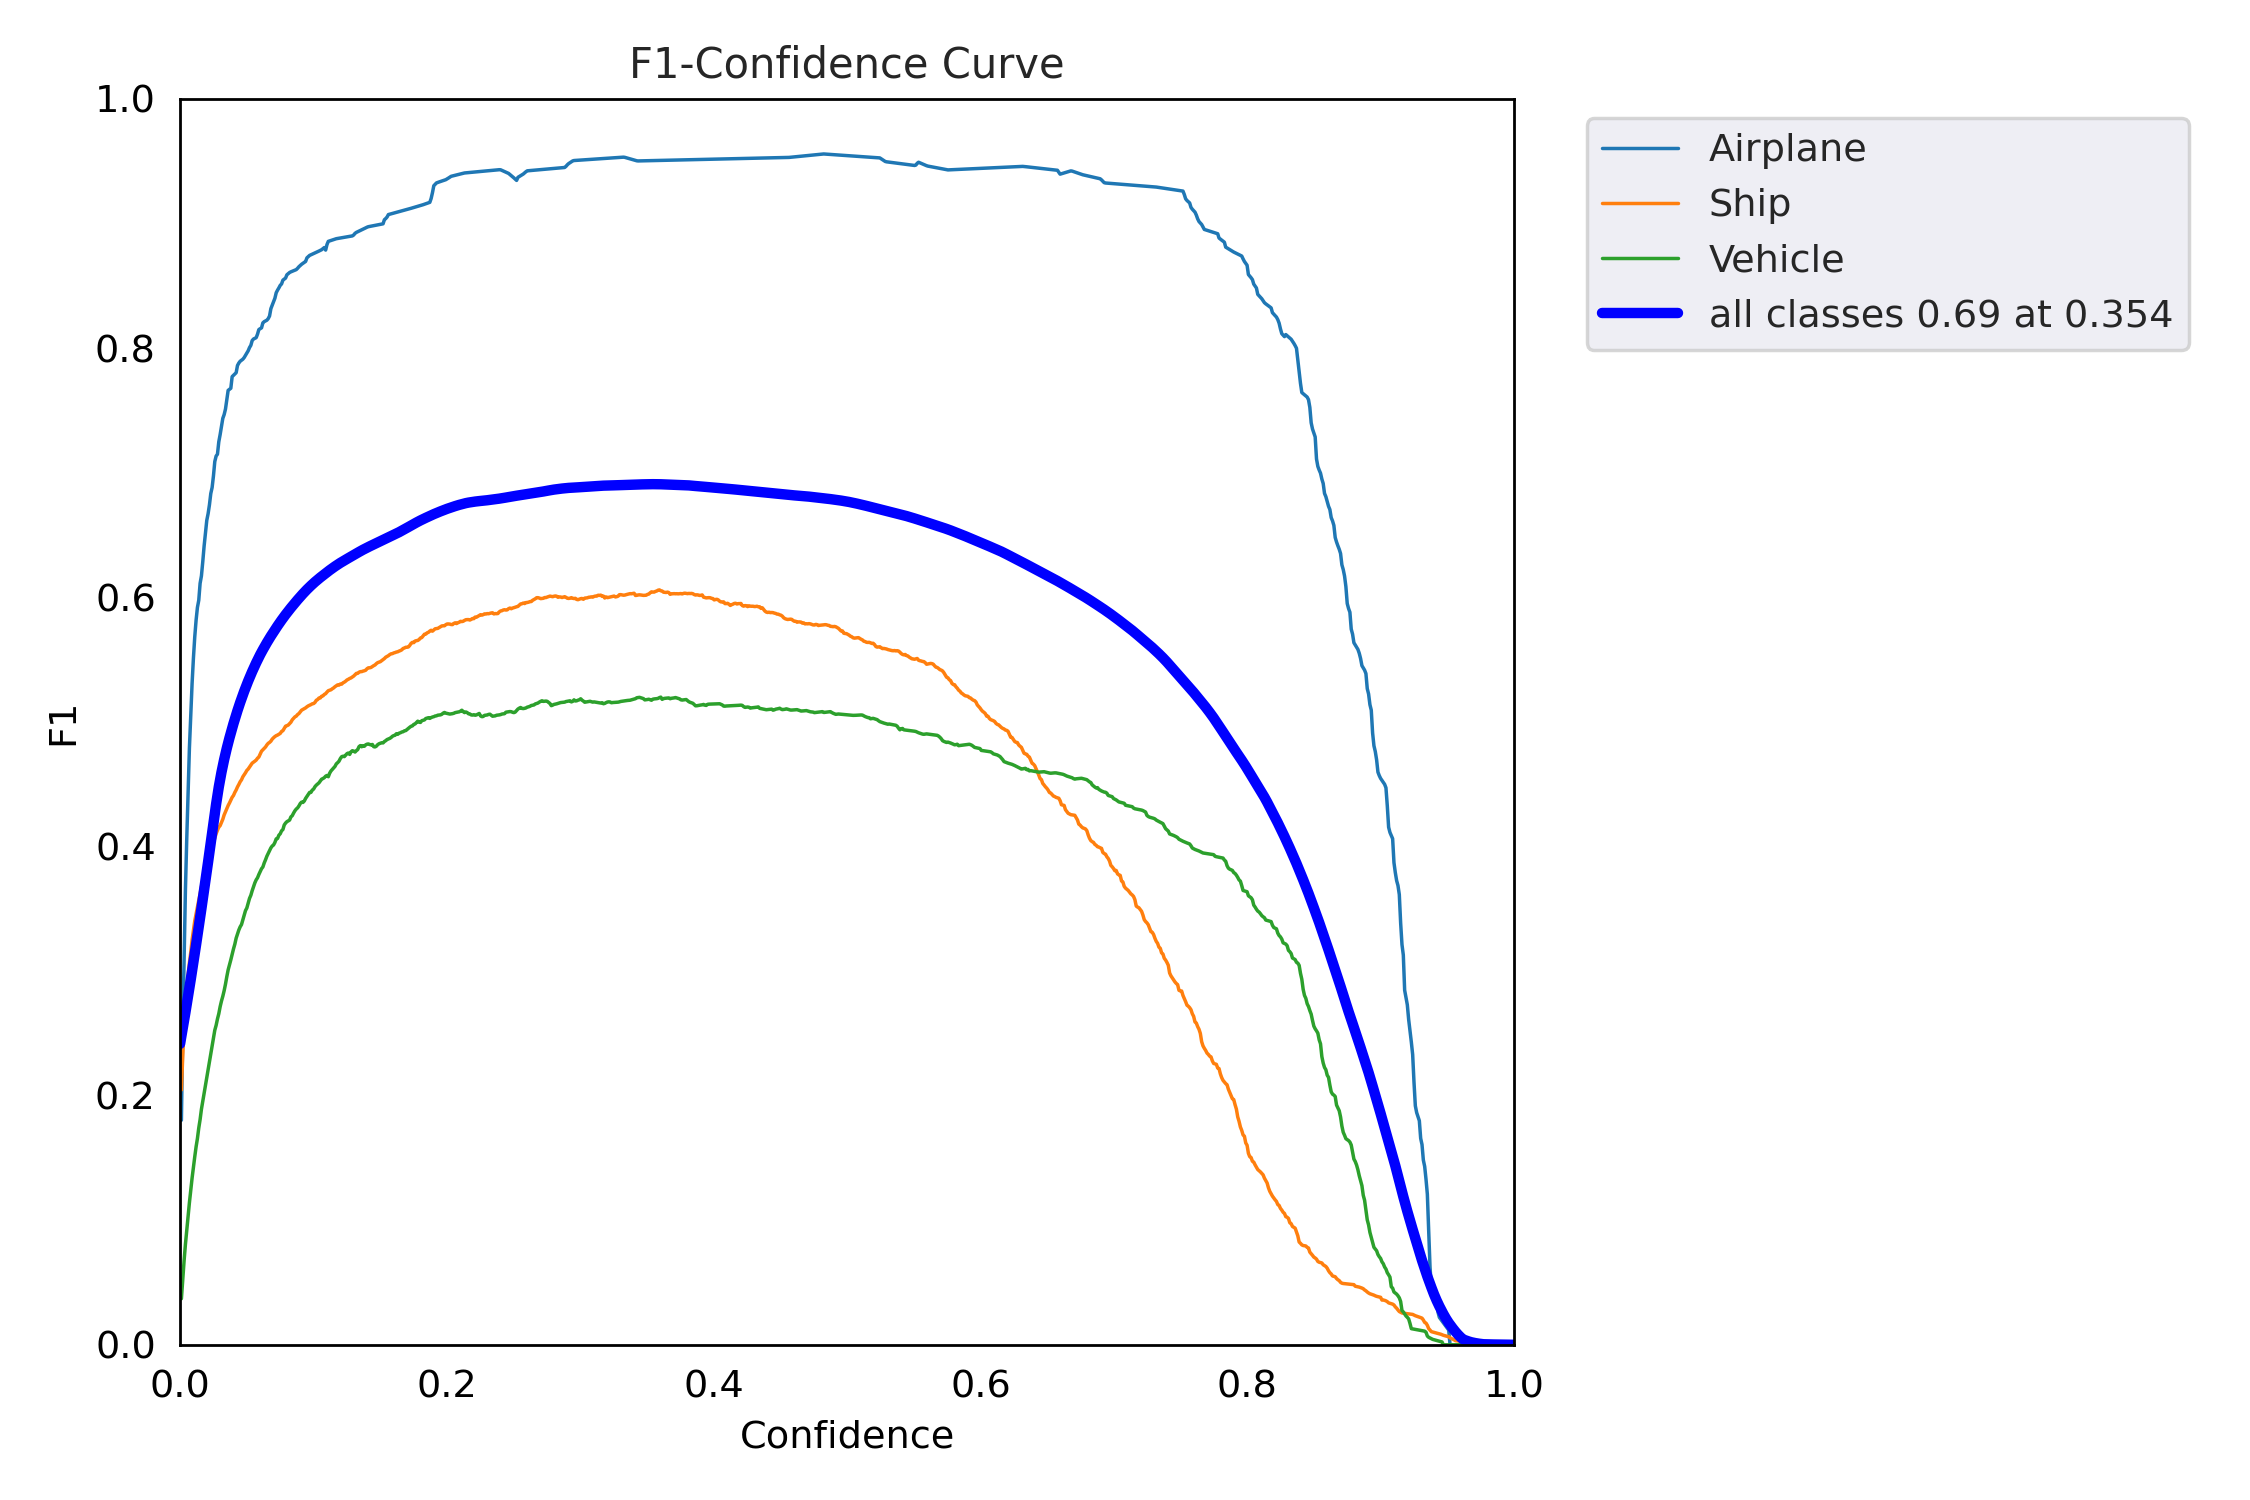

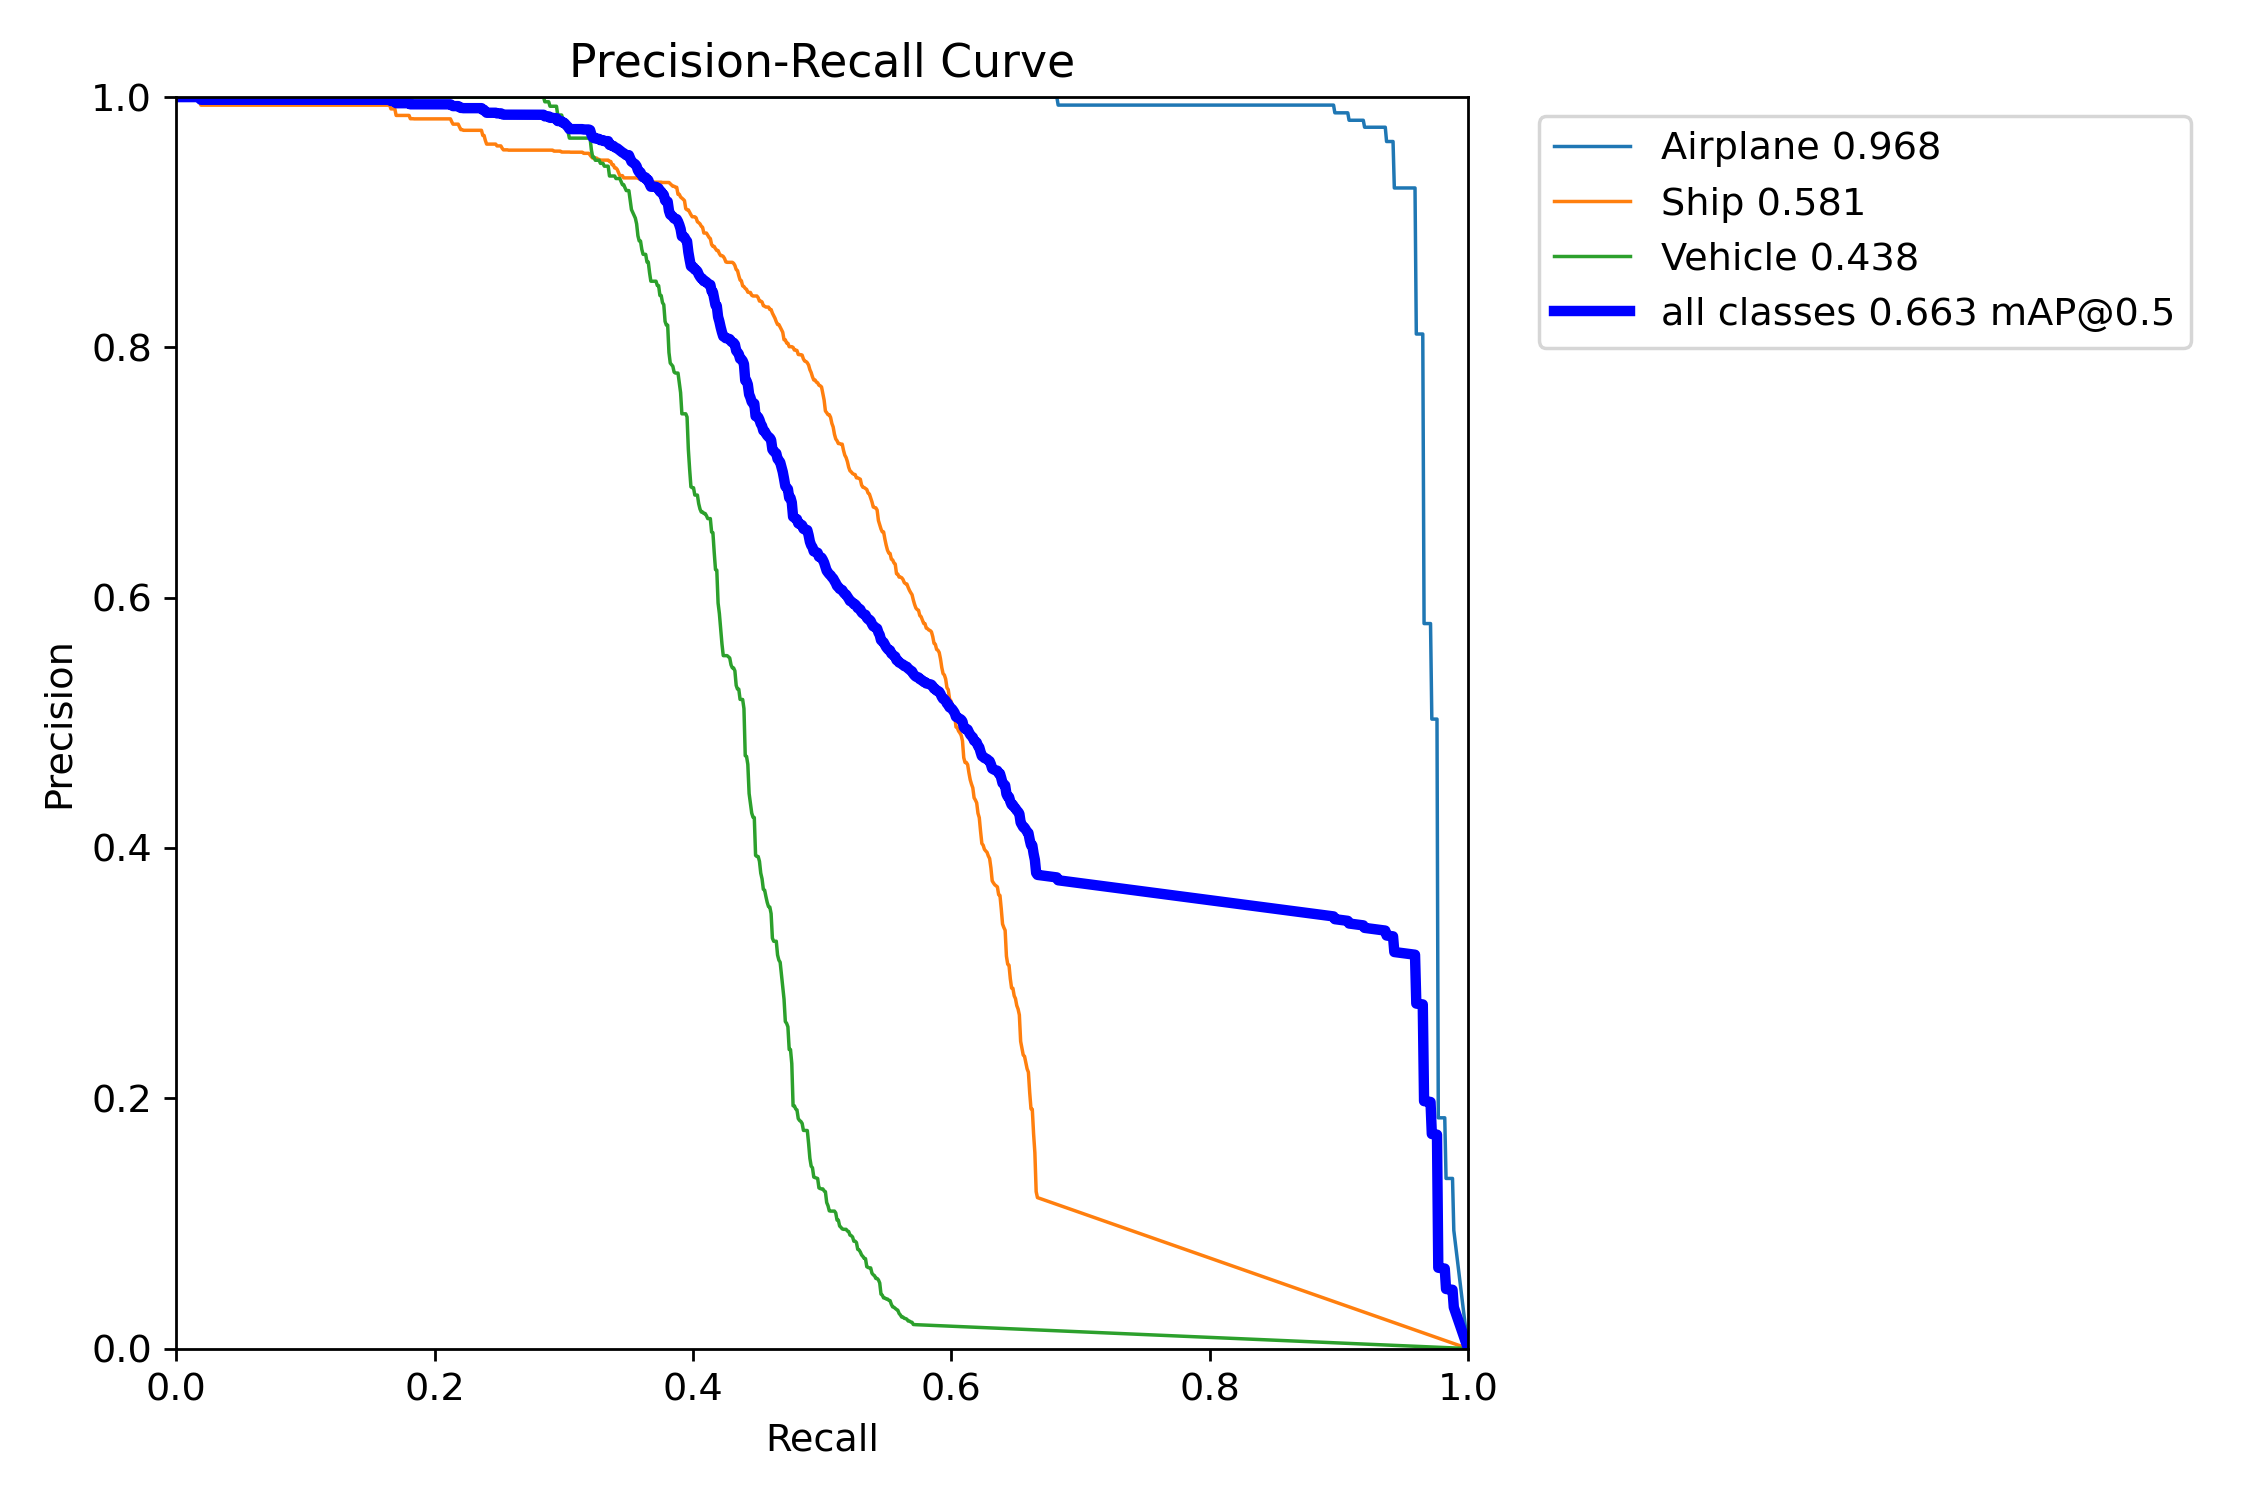

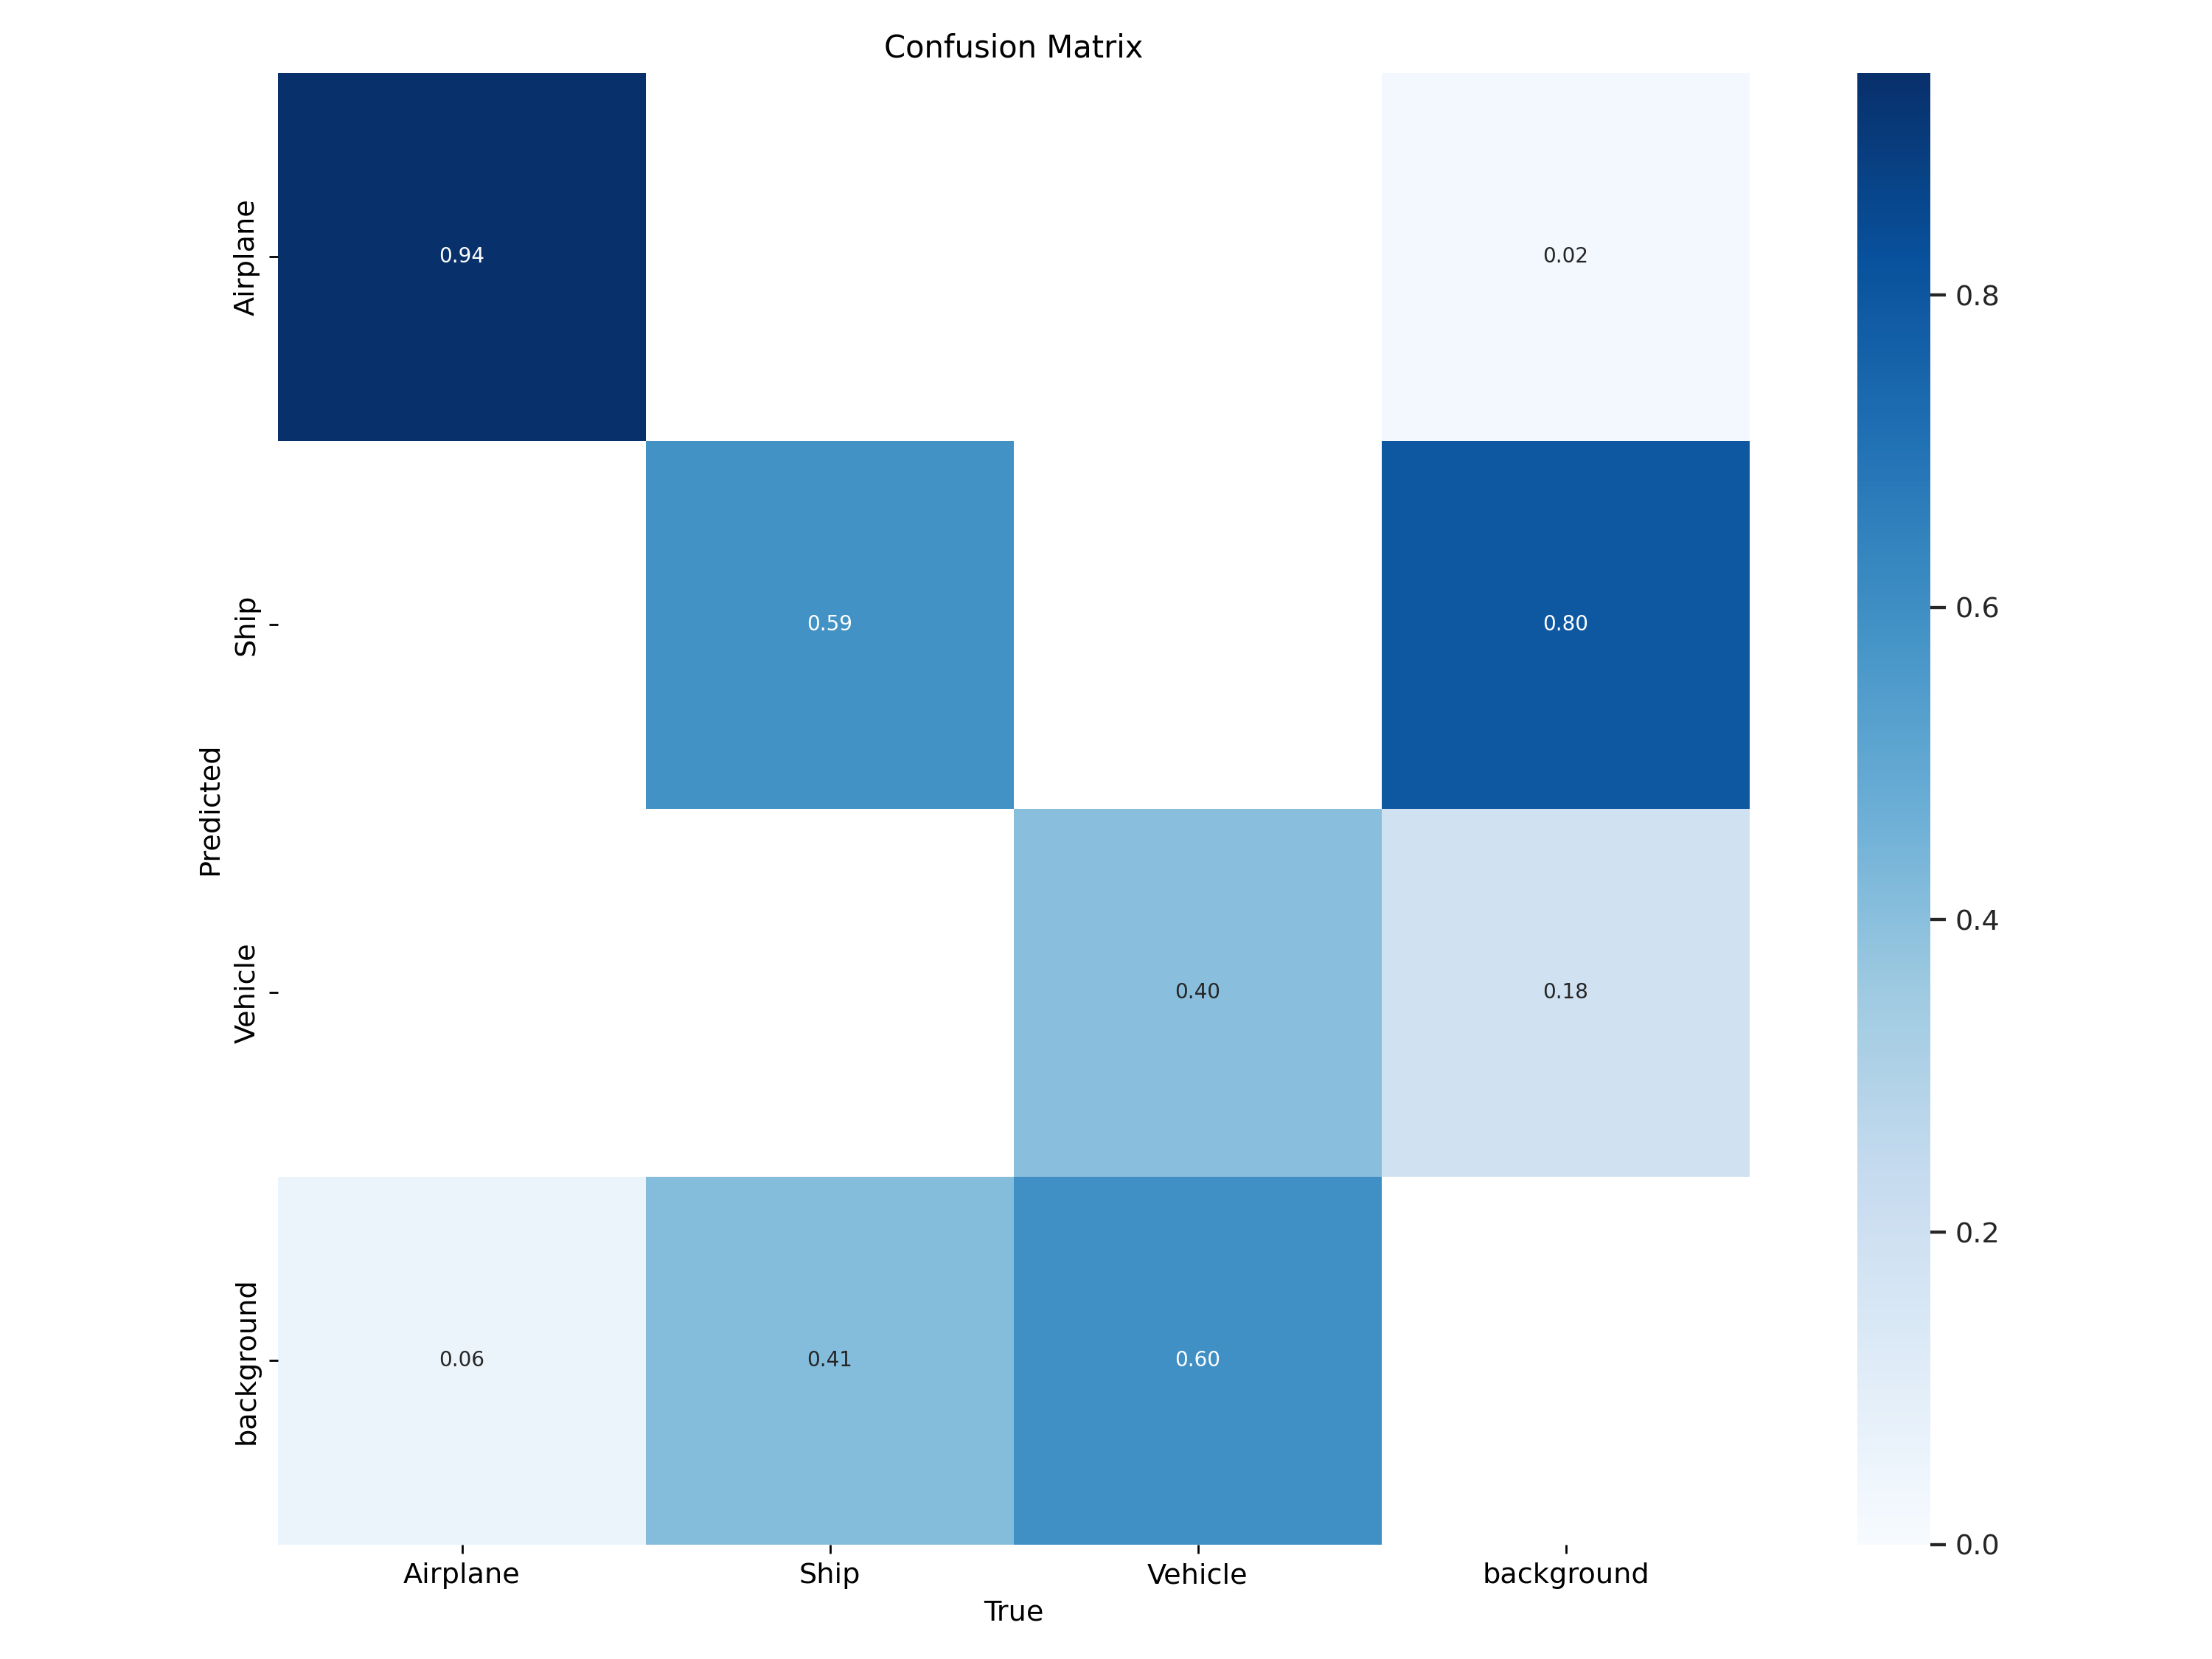

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp/F1_curve.png')
y = Image(filename='runs/train/exp/PR_curve.png')
z = Image(filename='runs/train/exp/confusion_matrix.png')
display(x, y,z)

# Yolov 5x6

In [ ]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/15/dior/yolov5/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-01 19:22:58.060789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 19:22:58.060853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 19:22:58.060890: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/15/dior/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

In [5]:
p_yol5 = 0.885
r_yol5 = 0.645
mAP_yolo5 = 0.944

storeResults('YoloV5x6',p_yol5,r_yol5,mAP_yolo5)

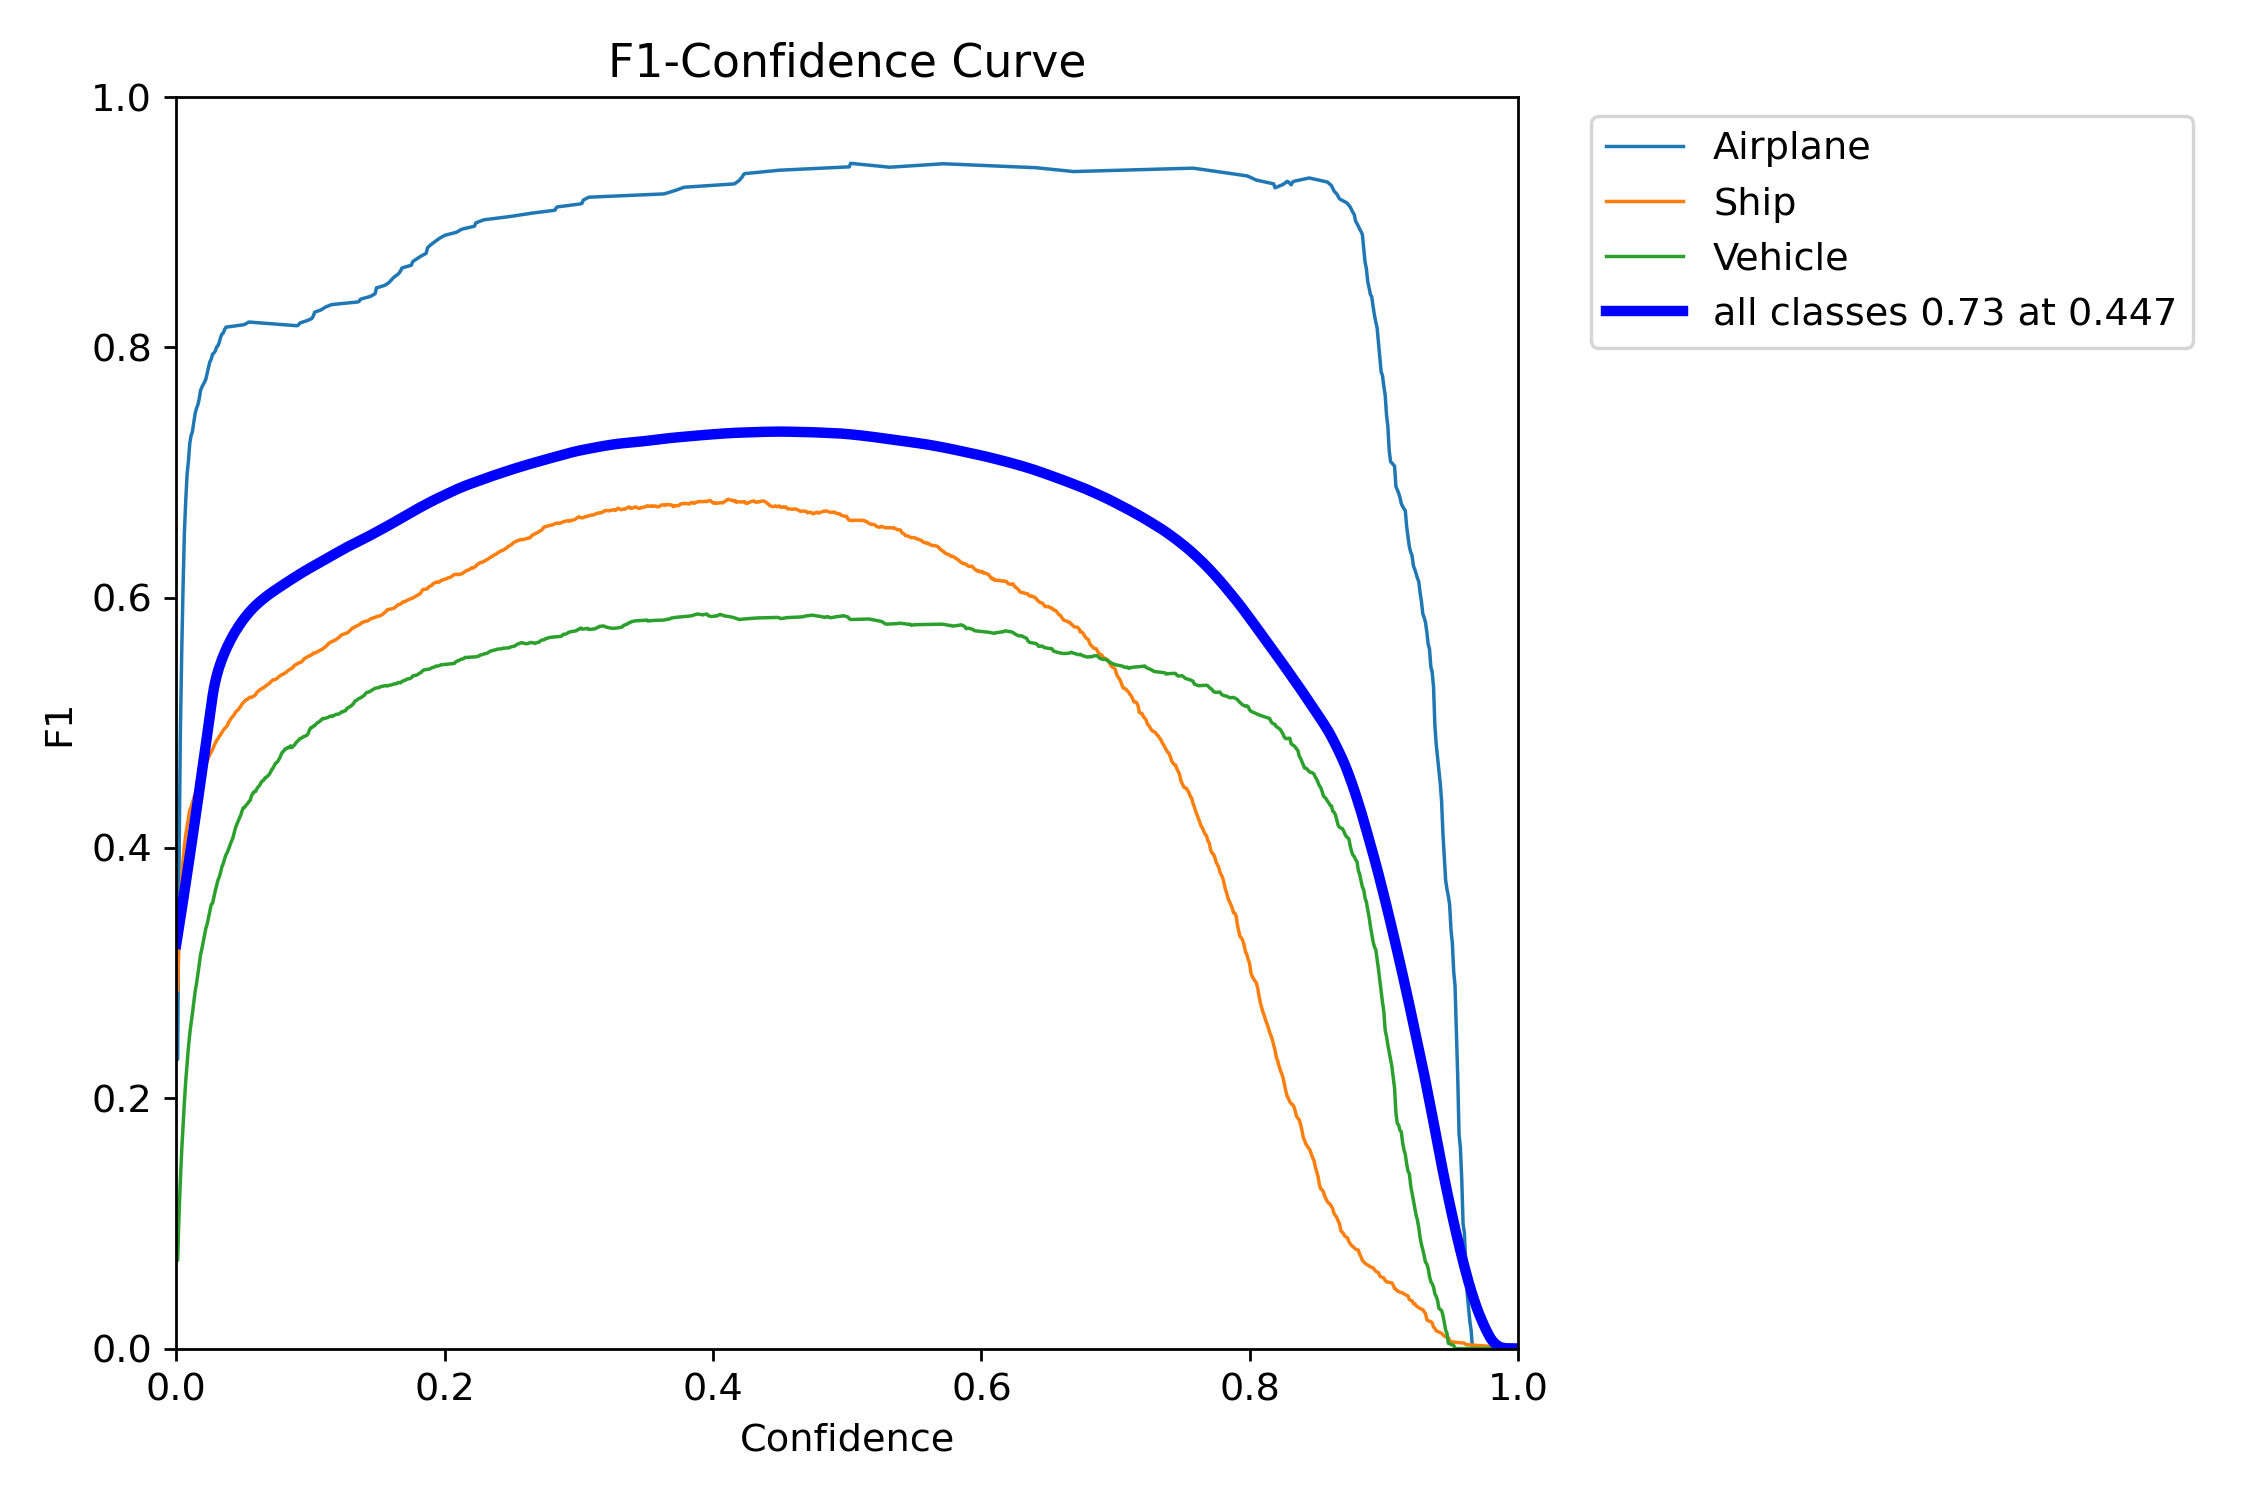

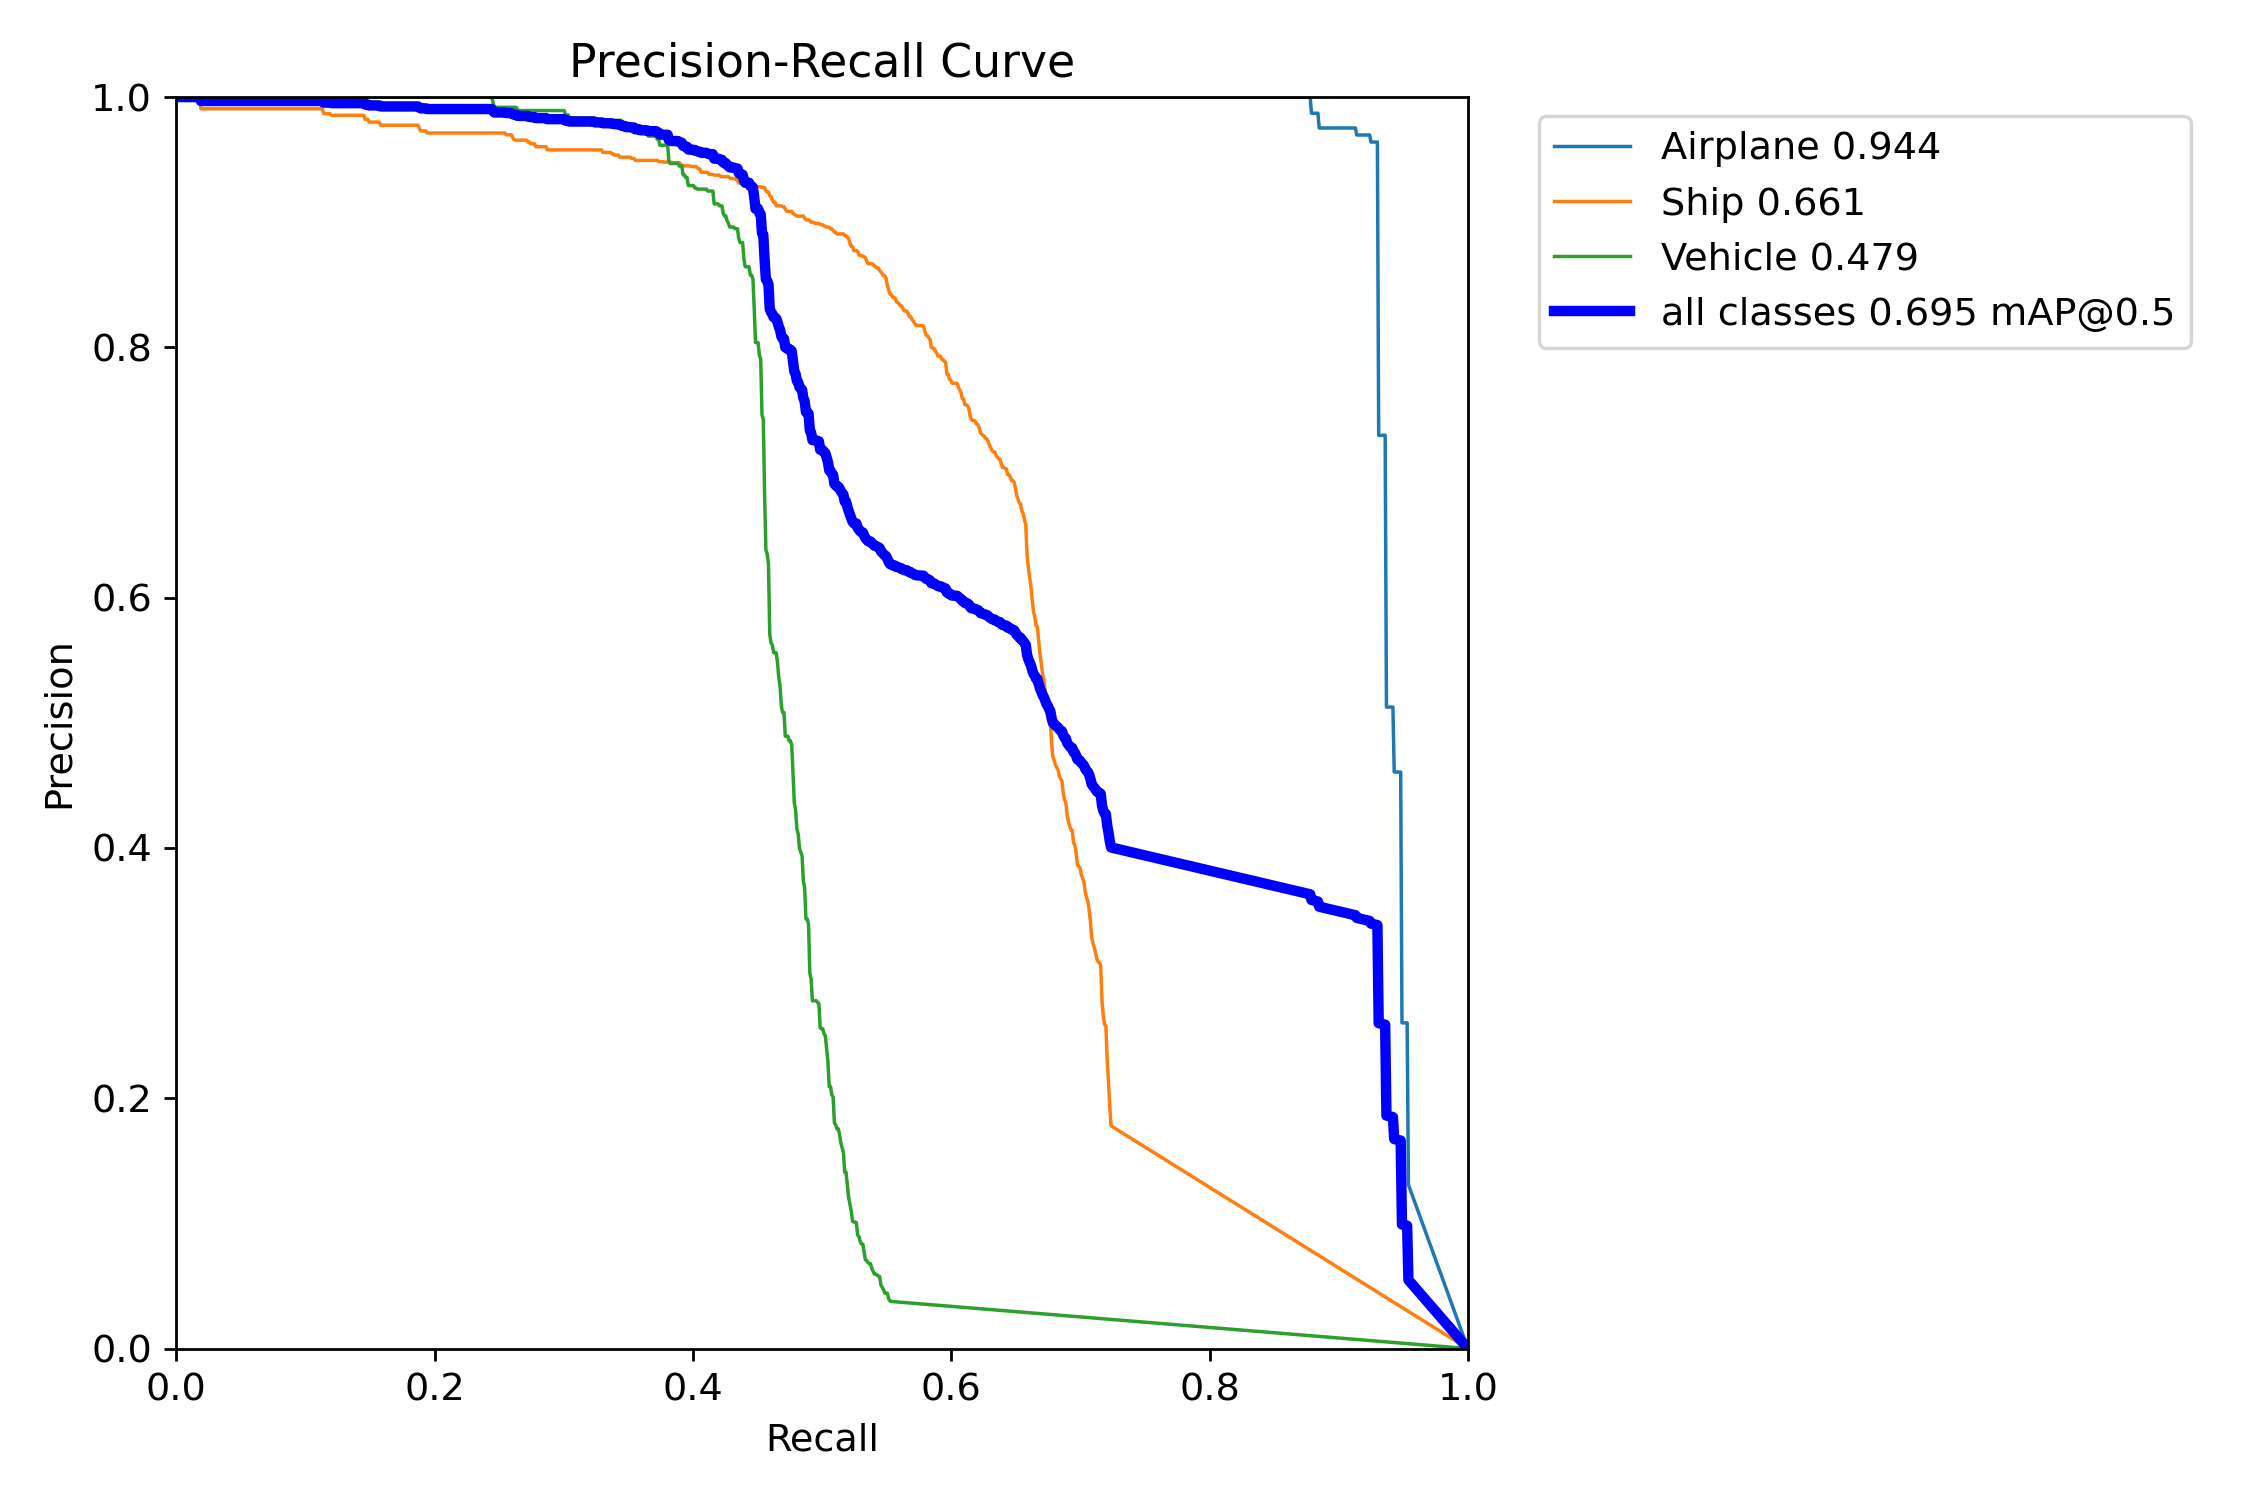

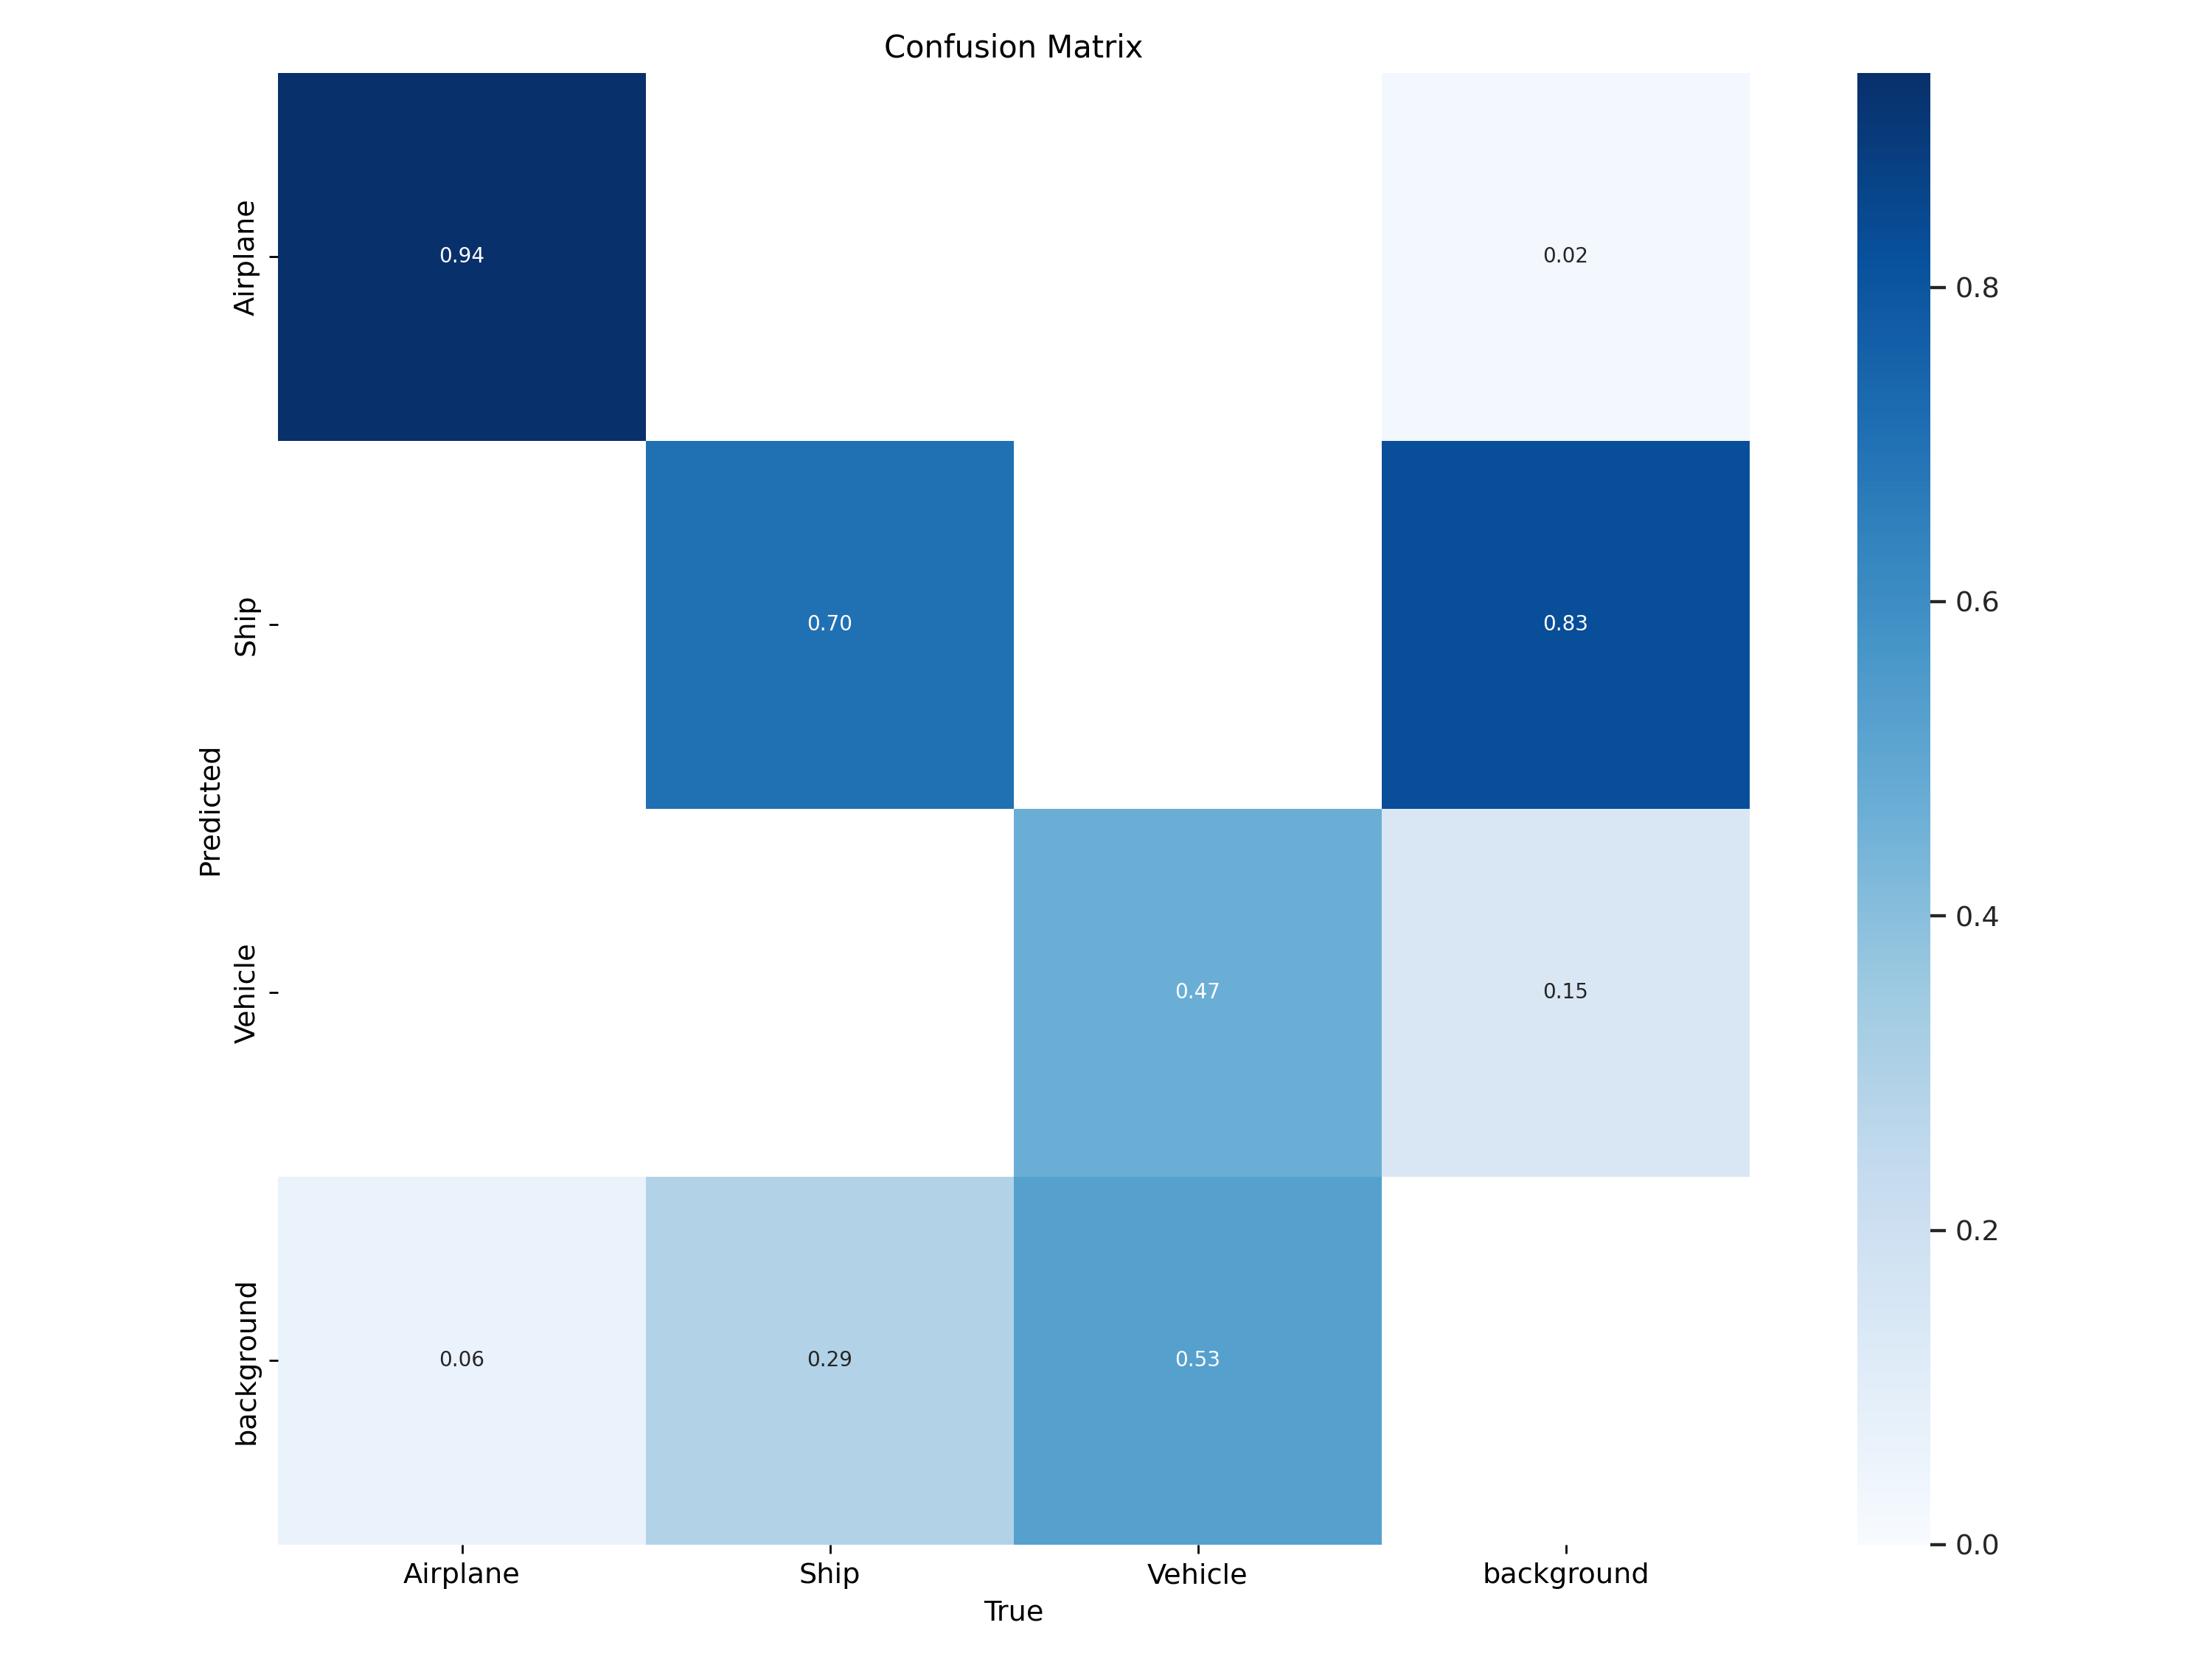

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp2/F1_curve.png')
y = Image(filename='runs/train/exp2/PR_curve.png')
z = Image(filename='runs/train/exp2/confusion_matrix.png')
display(x, y,z)

# RAST-YOLO

In [ ]:
!python train.py --data /content/drive/MyDrive/15/dior/yolov5/data.yaml --epochs 200 --weights '' --cfg /content/drive/MyDrive/15/model.yaml --img 416  # from scratch

2023-12-01 22:52:27.281787: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 22:52:27.281853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 22:52:27.281884: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/drive/MyDrive/15/model.yaml, data=/content/drive/MyDrive/15/dior/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, sing

In [6]:
p_yol5 = 0.838
r_yol5 = 0.572
mAP_yolo5 = 0.626

storeResults('RAST-Yolo',p_yol5,r_yol5,mAP_yolo5)

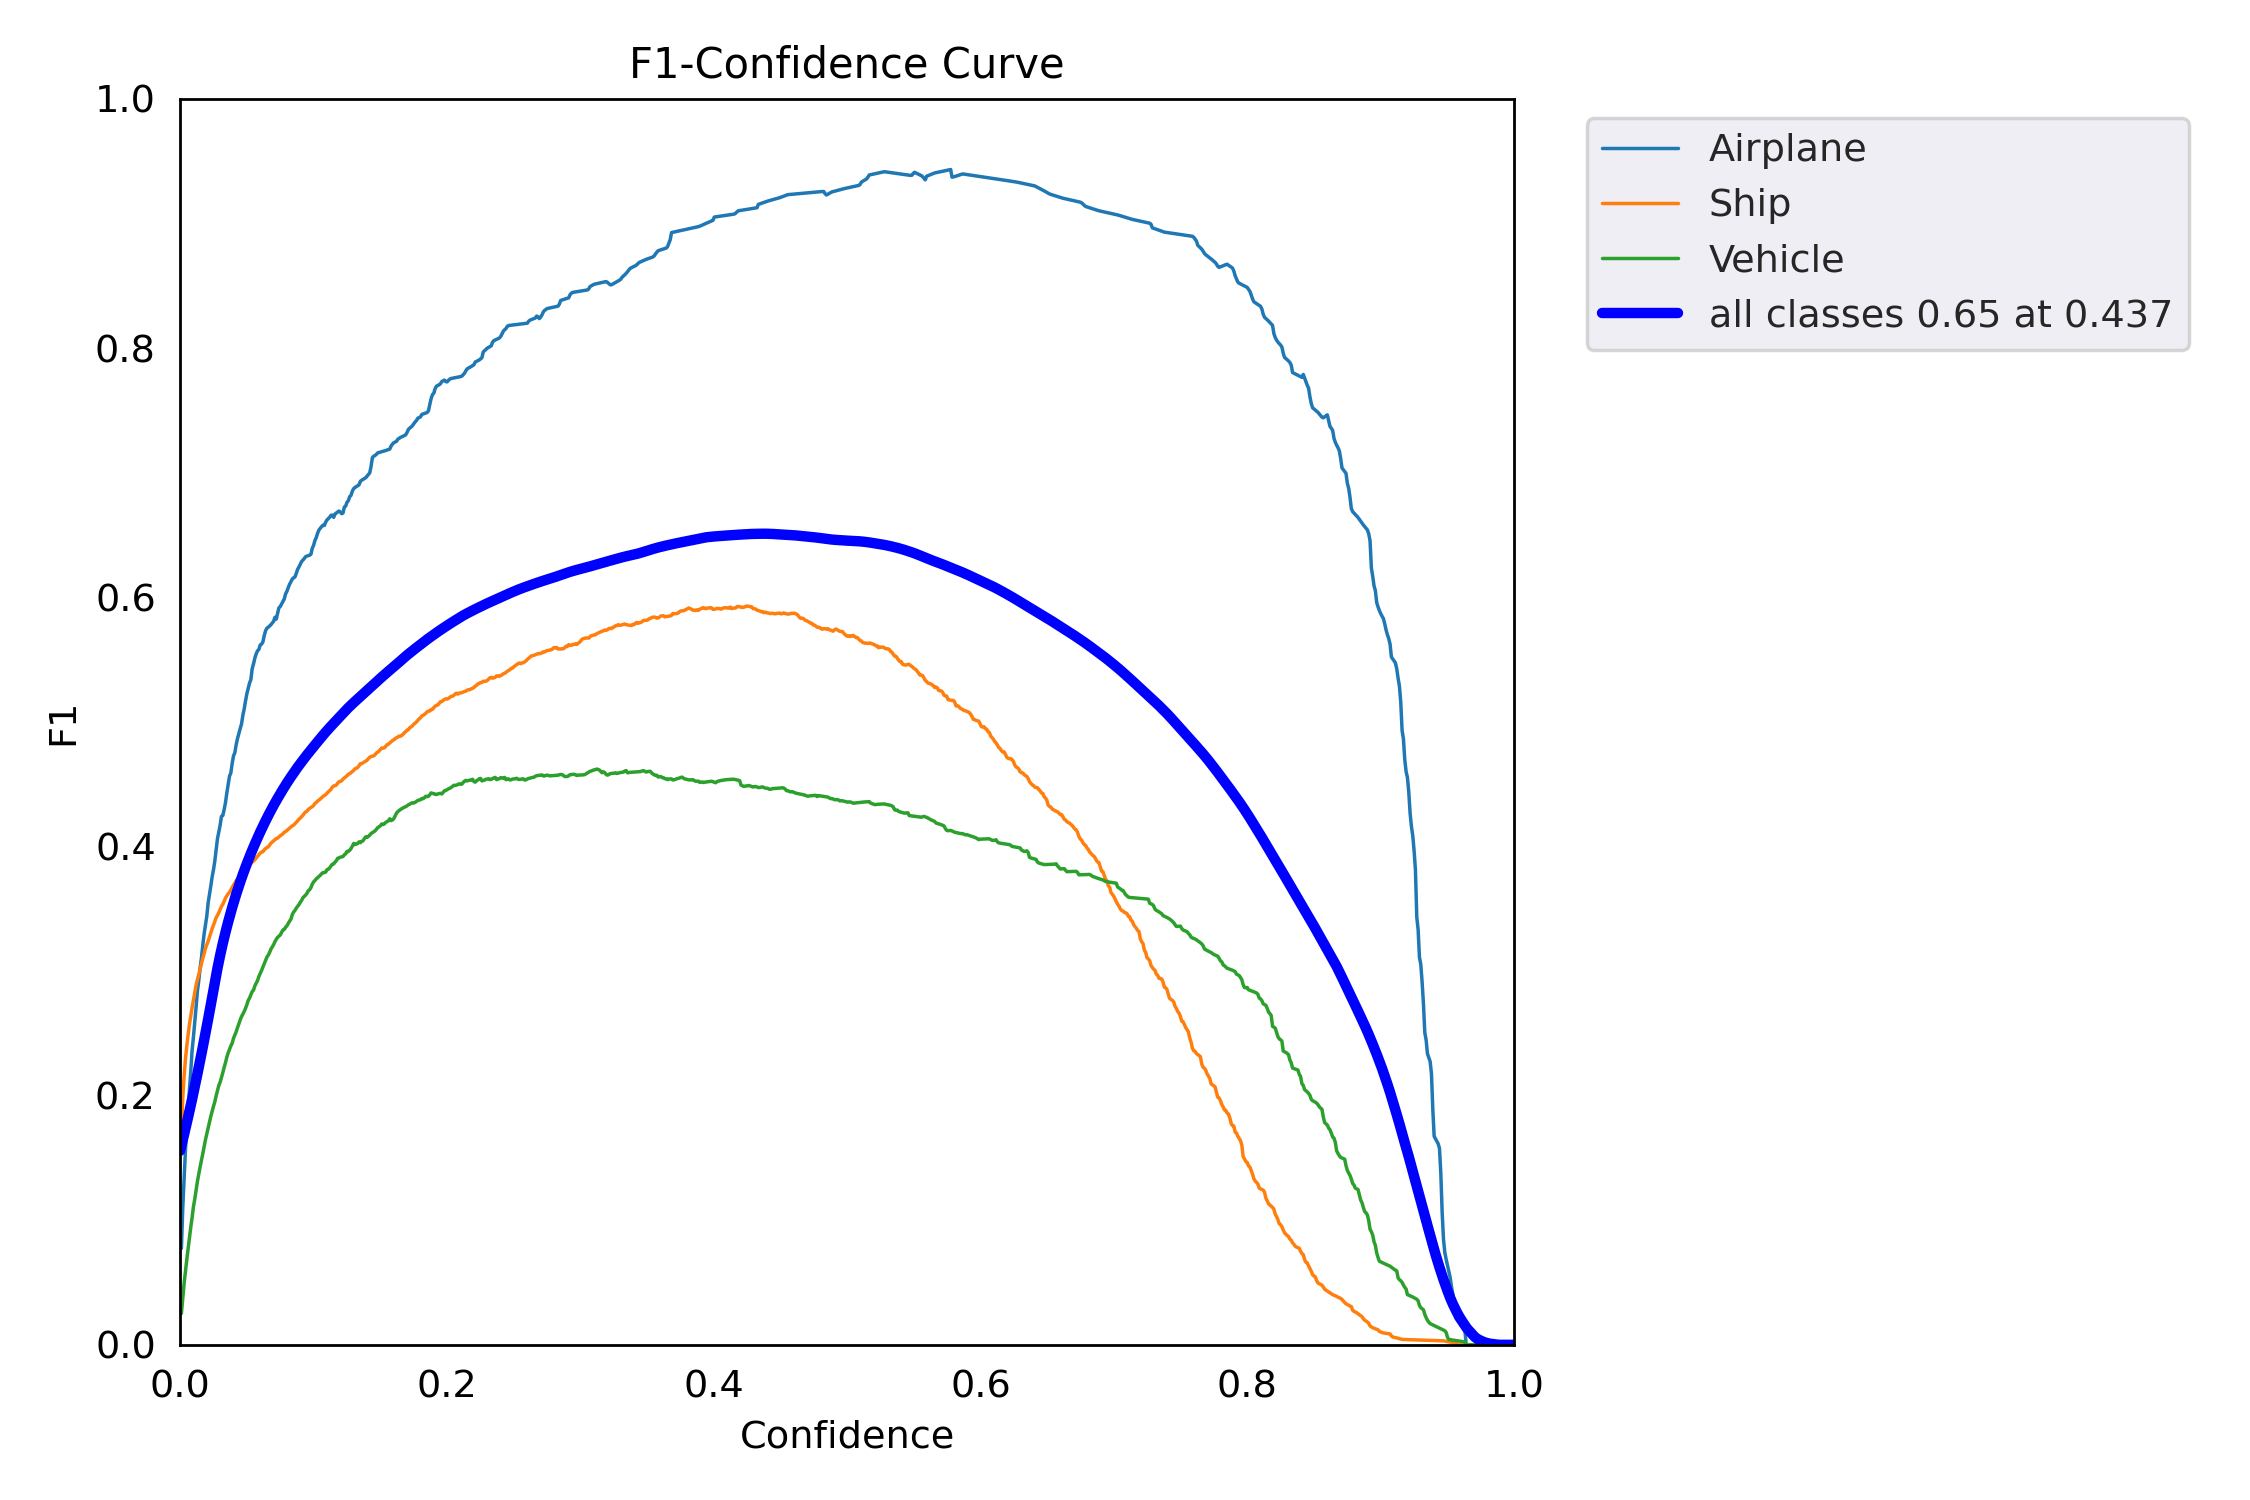

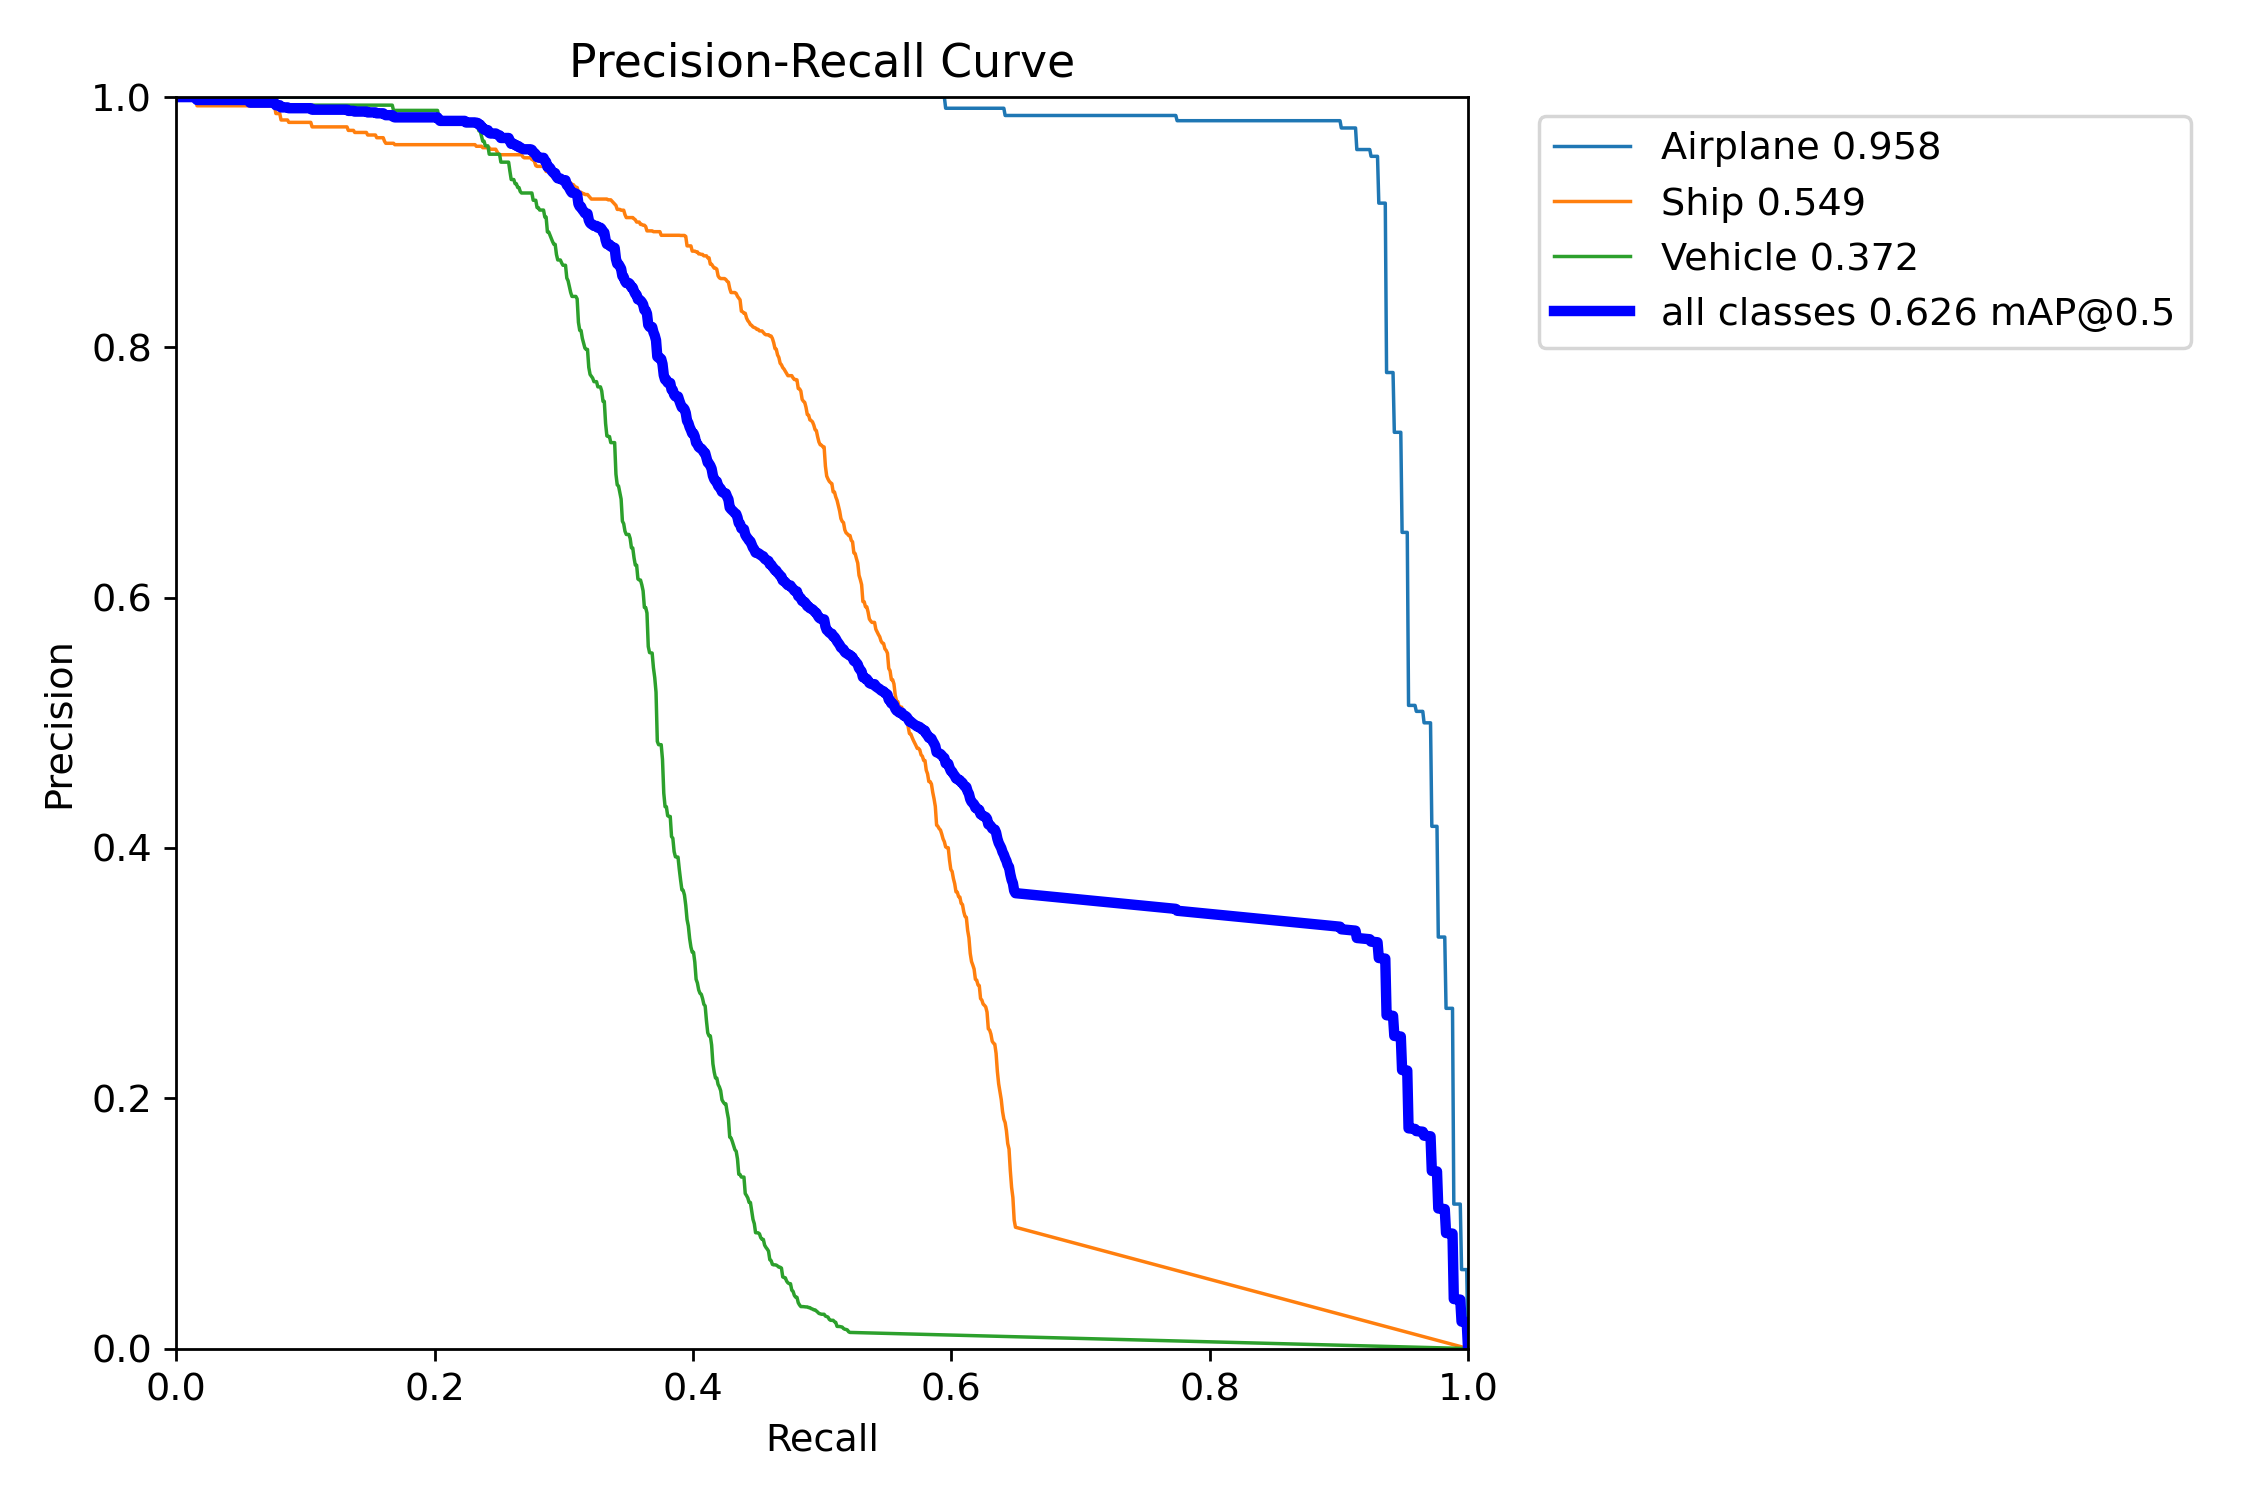

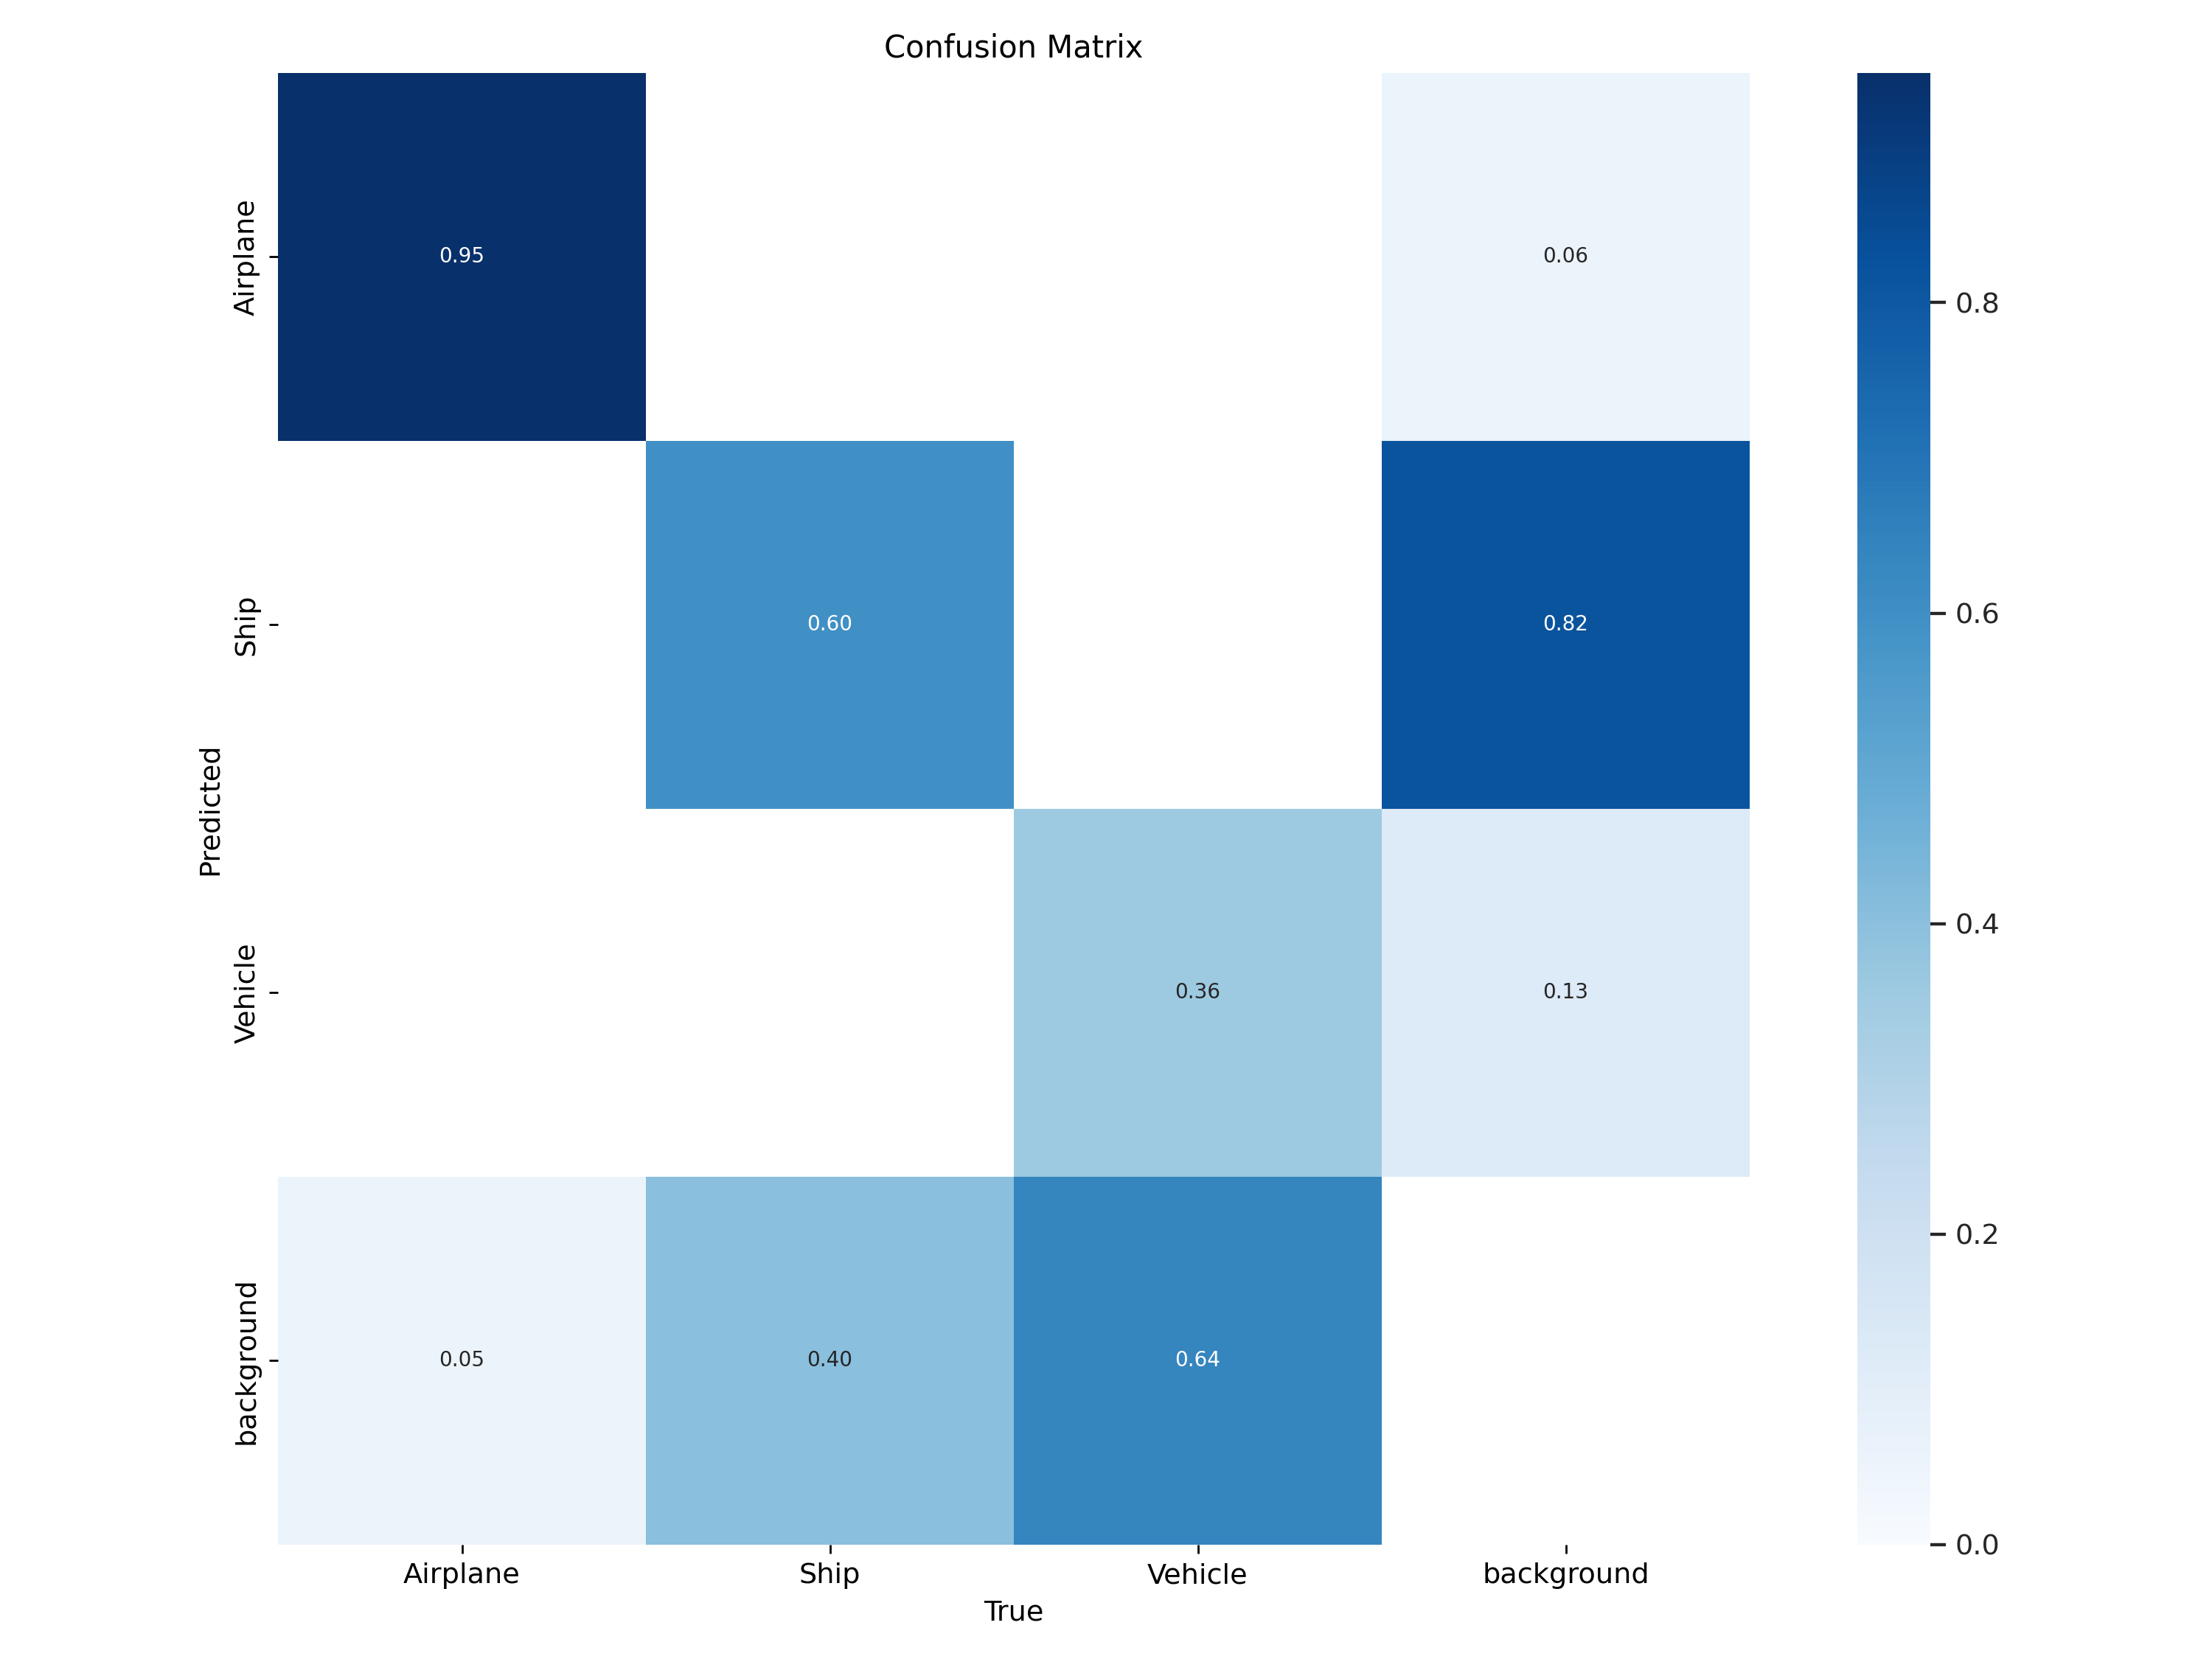

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp3/F1_curve.png')
y = Image(filename='runs/train/exp3/PR_curve.png')
z = Image(filename='runs/train/exp3/confusion_matrix.png')
display(x, y,z)

In [ ]:
!zip -r /content/drive/MyDrive/15/dior/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/segment/ (stored 0%)
  adding: content/yolov5/segment/val.py (deflated 68%)
  adding: content/yolov5/segment/predict.py (deflated 70%)
  adding: content/yolov5/segment/train.py (deflated 69%)
  adding: content/yolov5/segment/tutorial.ipynb (deflated 75%)
  adding: content/yolov5/README.zh-CN.md (deflated 76%)
  adding: content/yolov5/data/ (stored 0%)
  adding: content/yolov5/data/coco128-seg.yaml (deflated 47%)
  adding: content/yolov5/data/Objects365.yaml (deflated 53%)
  adding: content/yolov5/data/VOC.yaml (deflated 55%)
  adding: content/yolov5/data/images/ (stored 0%)
  adding: content/yolov5/data/images/zidane.jpg (deflated 0%)
  adding: content/yolov5/data/images/bus.jpg (deflated 1%)
  adding: content/yolov5/data/SKU-110K.yaml (deflated 52%)
  adding: content/yolov5/data/GlobalWheat2020.yaml (deflated 54%)
  adding: content/yolov5/data/ImageNet.yaml (deflated 54%)
  adding: content/yolov5/data/Argoverse.yaml (defla

# YoloV3

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 10981, done.
remote: Counting objects: 100% (903/903), done.
remote: Compressing objects: 100% (430/430), done.
remote: Total 10981 (delta 618), reused 716 (delta 472), pack-reused 10078
Receiving objects: 100% (10981/10981), 9.87 MiB | 28.00 MiB/s, done.
Resolving deltas: 100% (7417/7417), done.


In [ ]:
%cd /content/yolov3/

/content/yolov3


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
train: '/content/drive/MyDrive/15/dior/yolov5/train/images'
val: '/content/drive/MyDrive/15/dior/yolov5/valid/images'


nc: 3
names: ['Airplane', 'Ship', 'Vehicle']

In [ ]:
!python train.py --img 416 --batch 16 --epochs 200 --data /content/drive/MyDrive/15/dior/yolov5/data.yaml --weights yolov3.pt

2023-12-02 03:50:05.736285: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 03:50:05.736329: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 03:50:05.736357: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov3.pt, cfg=, data=/content/drive/MyDrive/15/dior/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD

In [7]:
p_yol = 0.877
r_yol = 0.664
mAP_yolo = 0.709

storeResults('YoloV3',p_yol,r_yol,mAP_yolo)

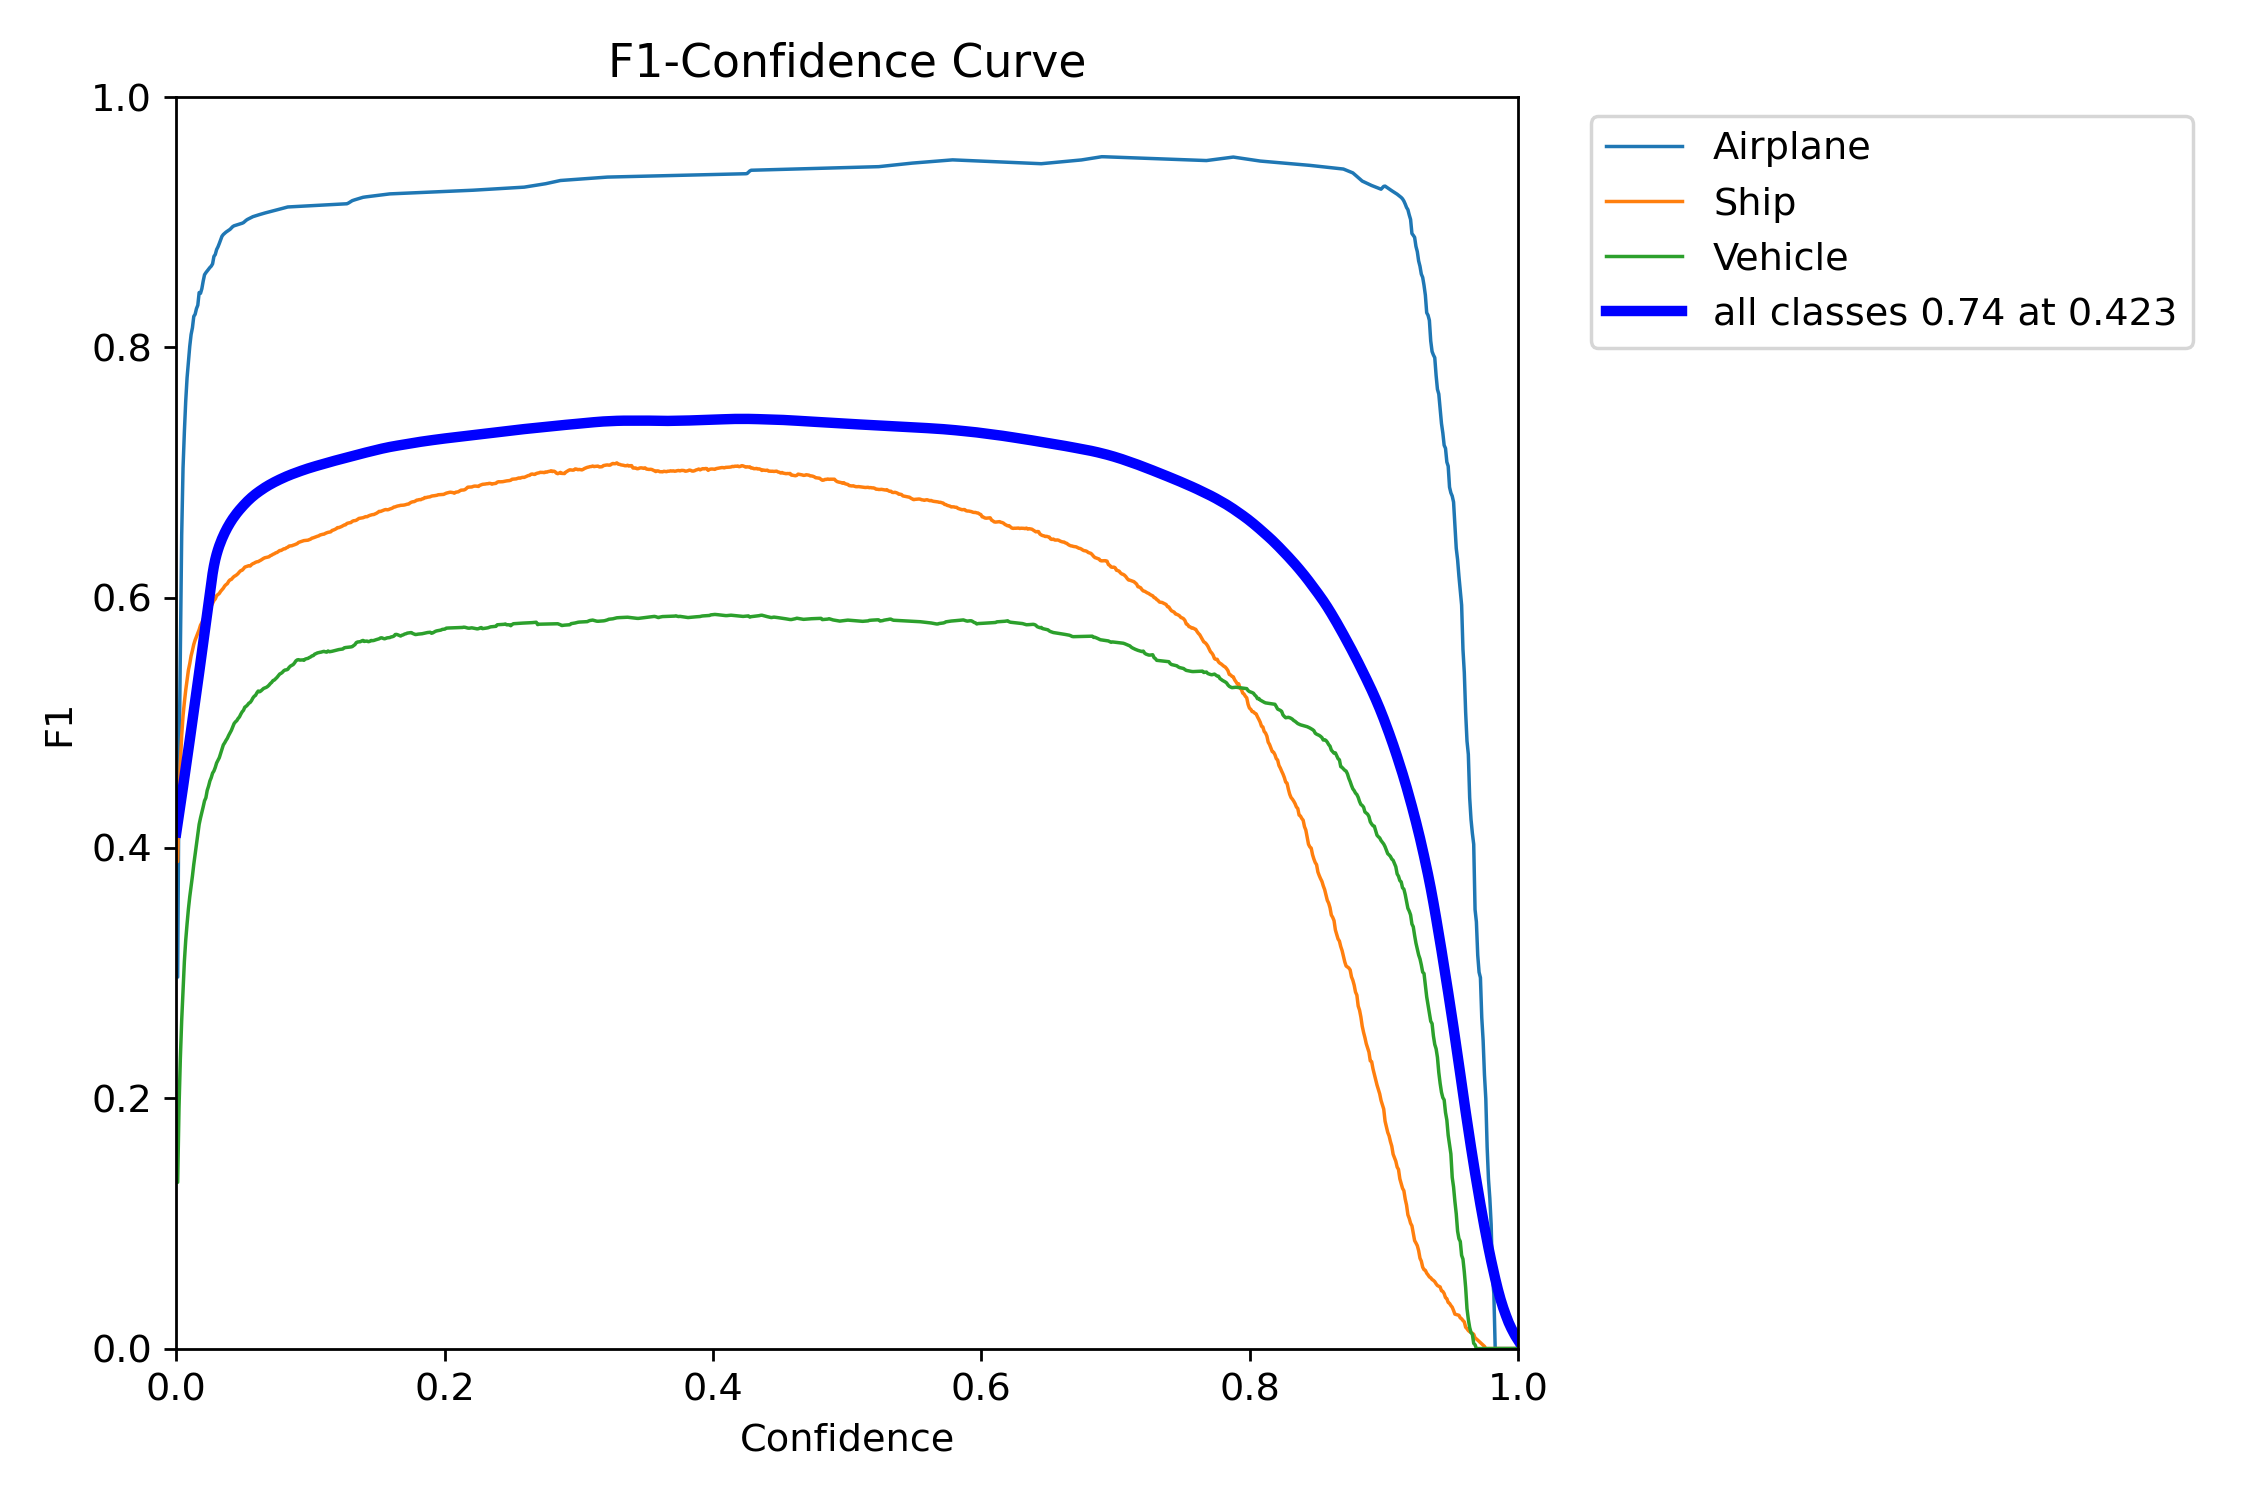

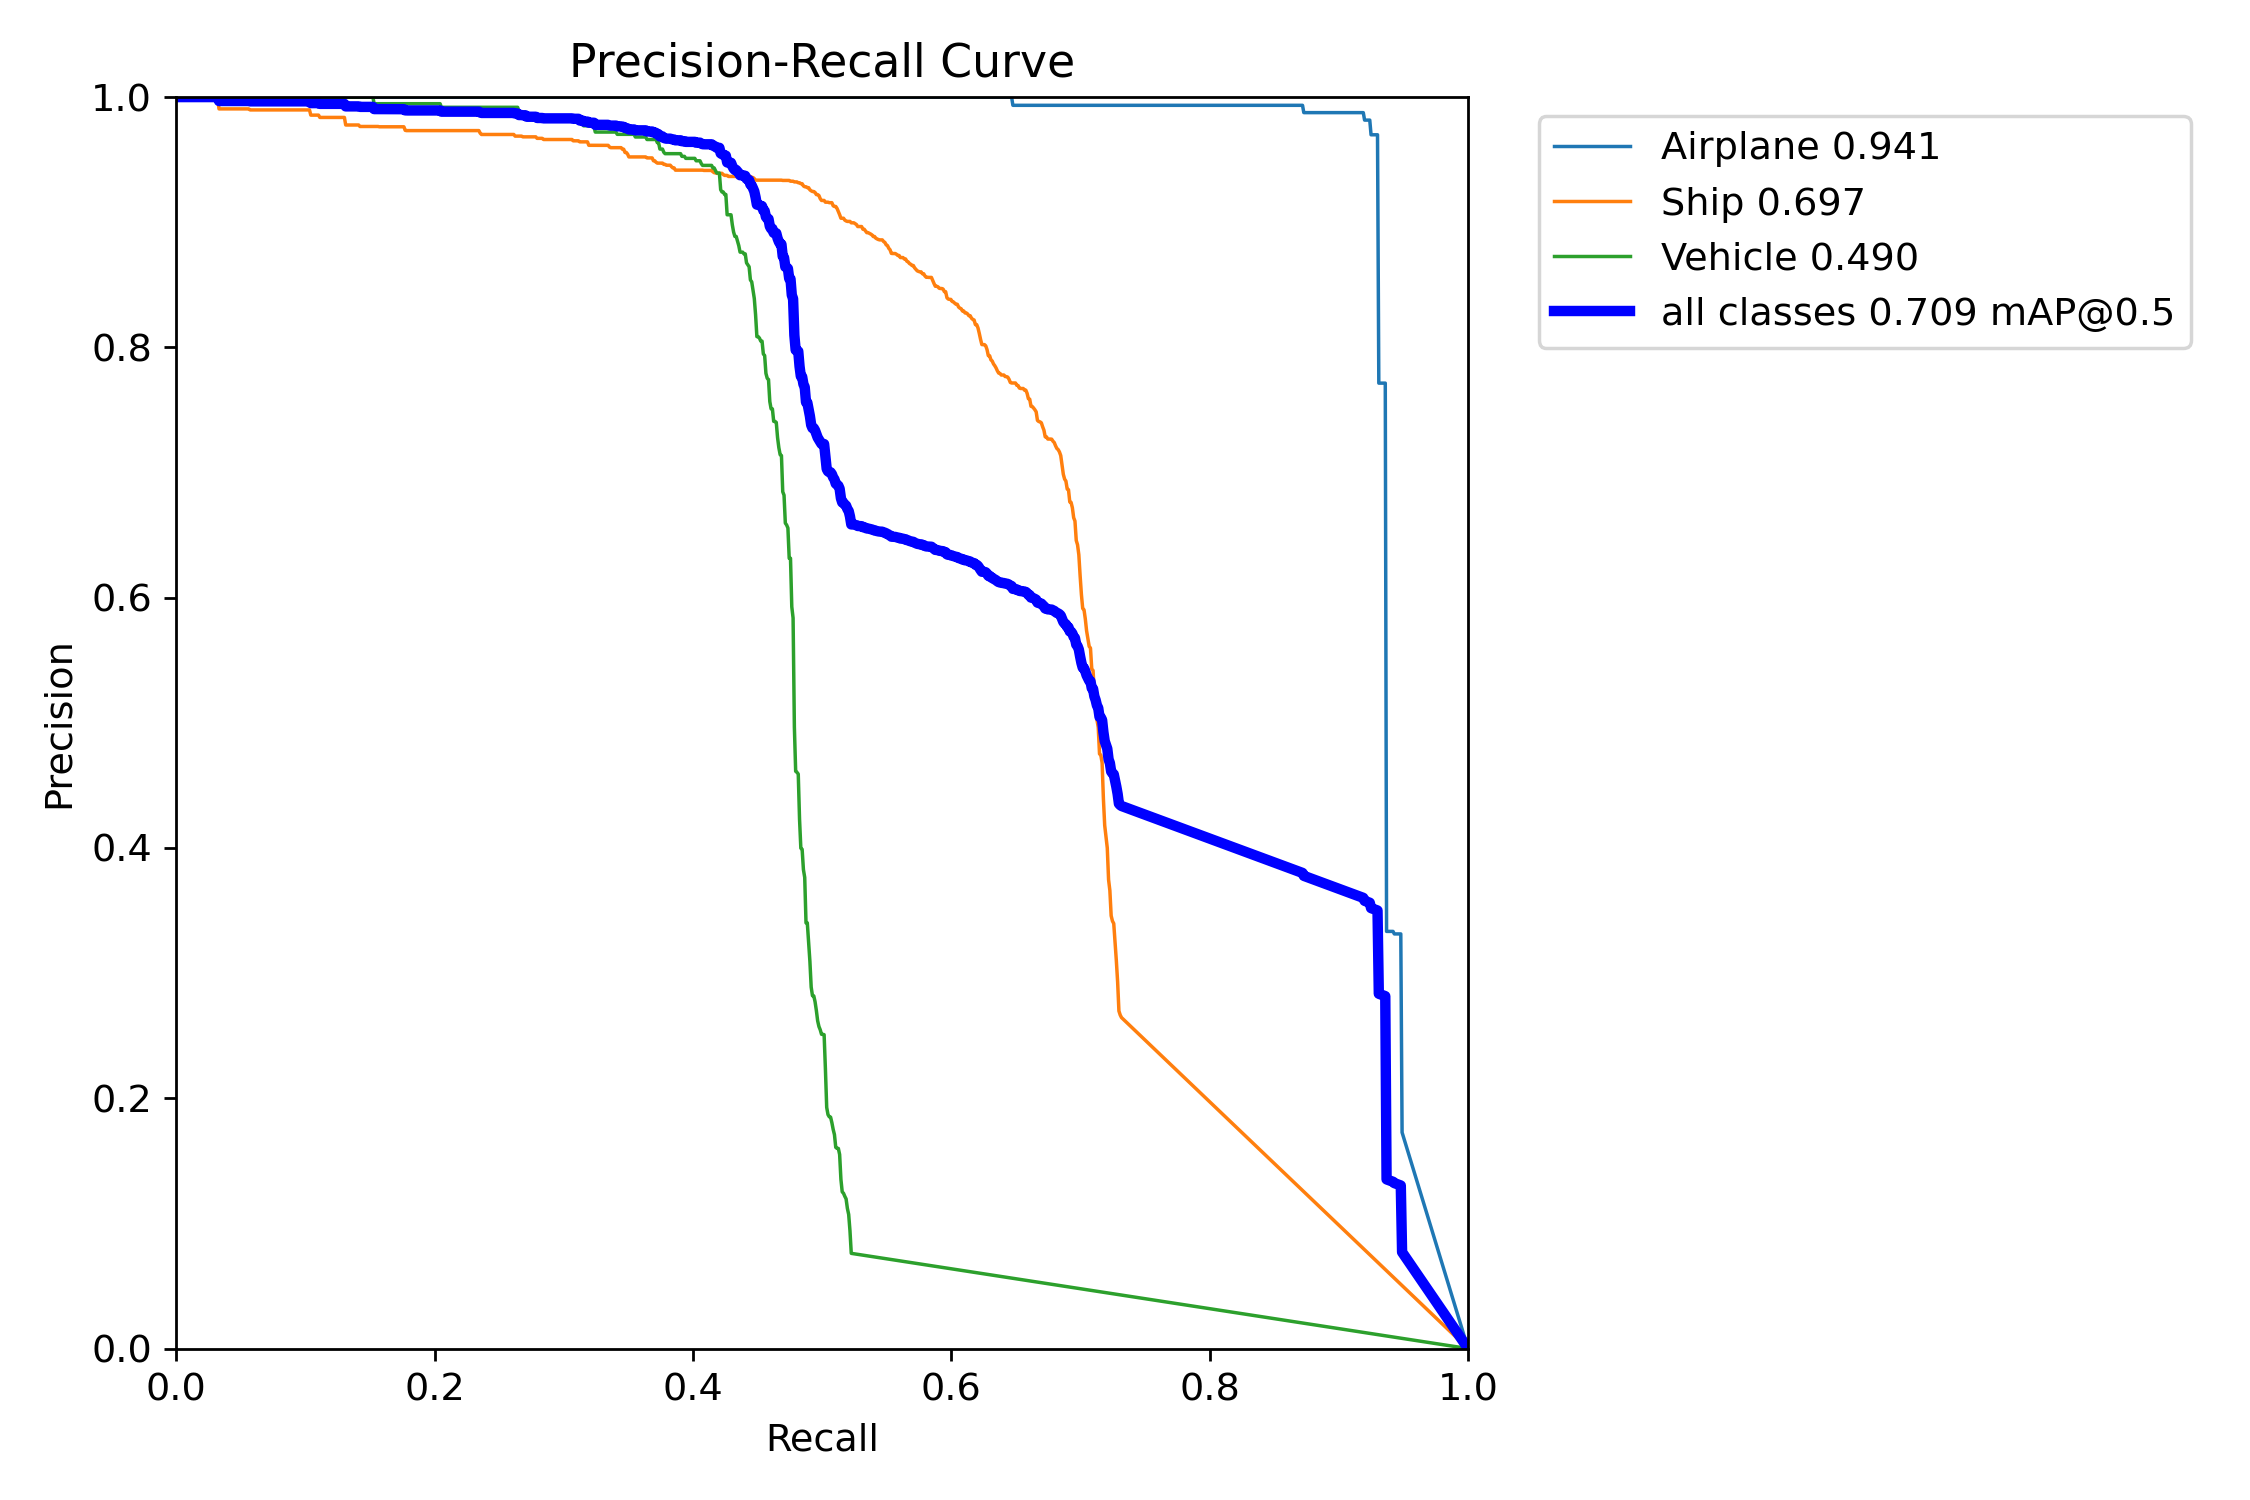

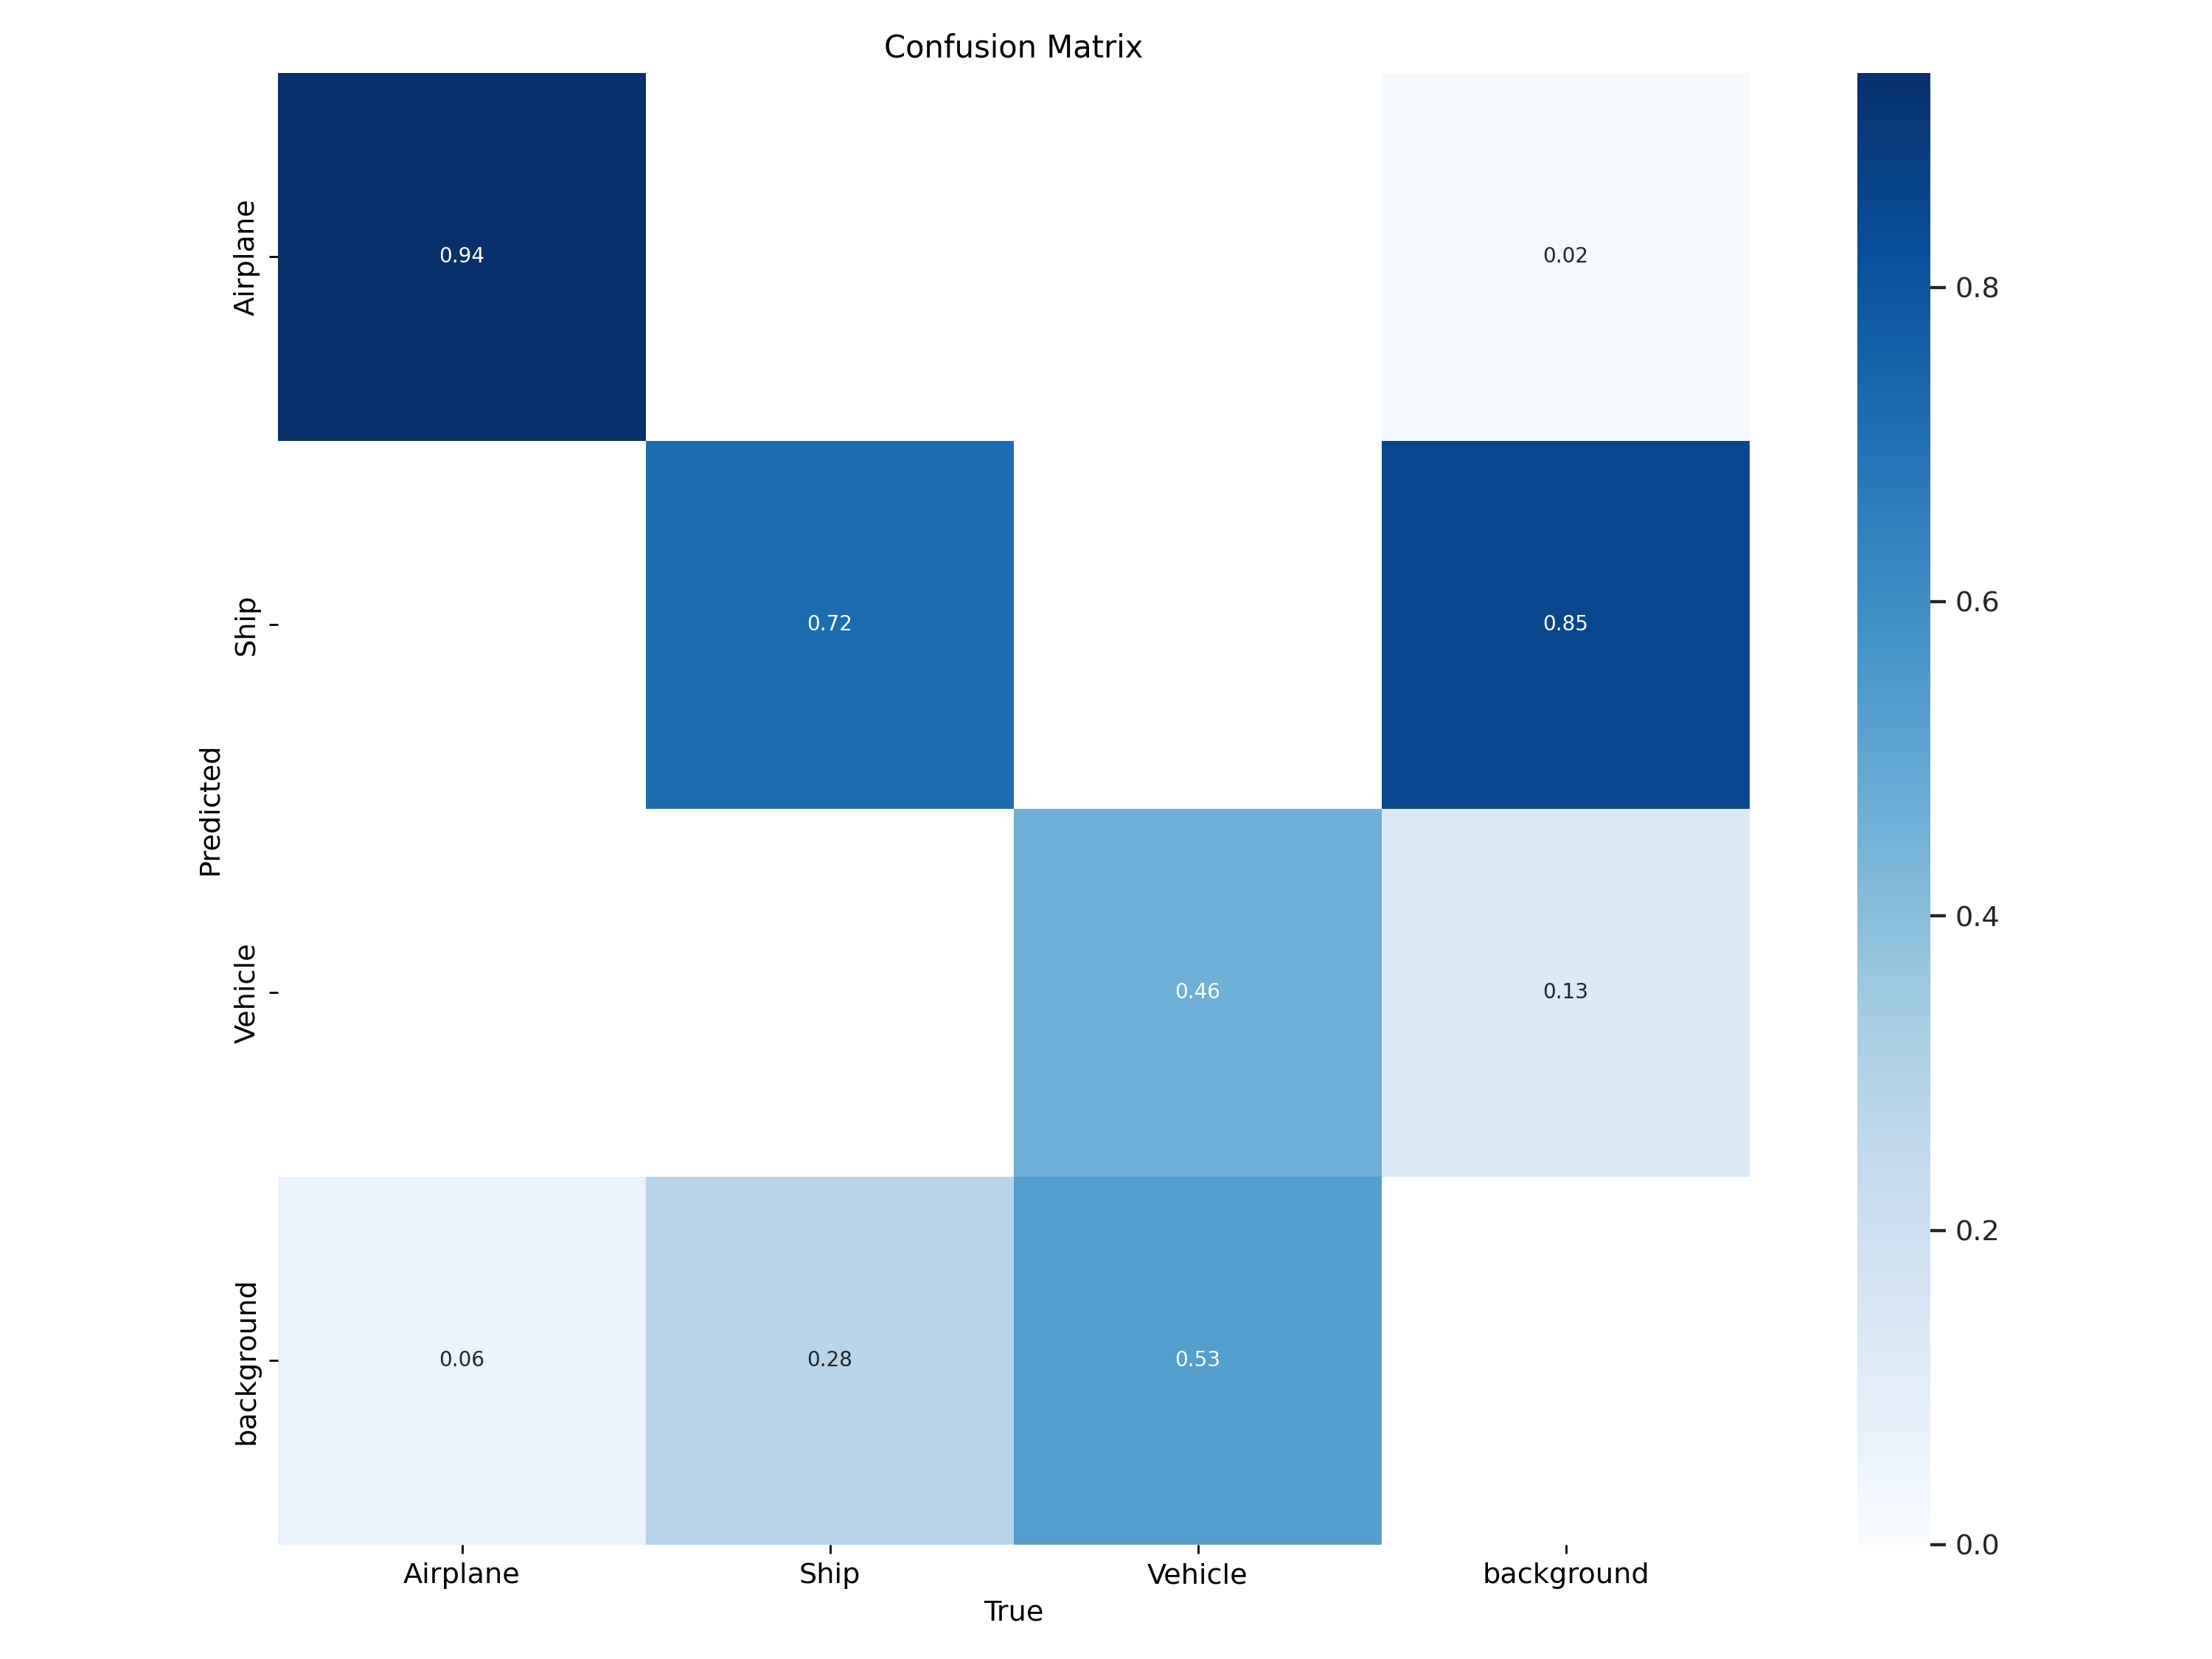

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='/content/yolov3/runs/train/exp/F1_curve.png')
y = Image(filename='/content/yolov3/runs/train/exp/PR_curve.png')
z = Image(filename='/content/yolov3/runs/train/exp/confusion_matrix.png')
display(x, y,z)

# YoloV8n

In [ ]:
%cd /content

/content


In [ ]:
!pip install ultralytics

In [ ]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/15/dior/yolov8'
!ls '/content/drive/MyDrive/15/dior/yolov8/train/'

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
images	labels	labels.cache


In [ ]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/15/dior/yolov8/train/images/00002_jpg.rf.b6e646d9cd9501a4ecacb721d91431a9.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/15/dior/yolov8/train/images/00096_jpg.rf.c8484296686ac17b5d36fda9d4cb94f5.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 104, 104
shape of the validation image 104, 104


In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/15/dior/yolov5/data.yaml", epochs=200, imgsz=415)  # train the model

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/15/dior/yolov5/data.yaml, epochs=200, patience=50, batch=16, imgsz=415, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

train: Scanning /content/drive/MyDrive/15/dior/yolov5/train/labels... 740 images, 0 backgrounds, 0 corrupt: 100%|██████████| 740/740 [00:33<00:00, 22.09it/s]

train: WARNING ⚠️ /content/drive/MyDrive/15/dior/yolov5/train/images/00594_jpg.rf.a29393b8a1a00aa7a97254c49768eb29.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/15/dior/yolov5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/15/dior/yolov5/valid/labels... 258 images, 0 backgrounds, 0 corrupt: 100%|██████████| 258/258 [00:09<00:00, 26.25it/s]

val: WARNING ⚠️ /content/drive/MyDrive/15/dior/yolov5/valid/images/00594_jpg.rf.b79aad18b6cb4c7291906abc0d7647ac.jpg: 1 duplicate labels removed
val: New cache created: /content/drive/MyDrive/15/dior/yolov5/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.15G      2.274      2.695      1.338         37        416: 100%|██████████| 47/47 [00:16<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        258       2951      0.267      0.192      0.143     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.35G      2.348      2.022      1.295         51        416: 100%|██████████| 47/47 [00:11<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        258       2951    0.00189     0.0348   0.000983   0.000401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.45G      2.382      1.984      1.331         31        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.171     0.0253     0.0056     0.0033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.51G       2.47      2.067      1.387         12        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        258       2951     0.0236     0.0108     0.0149     0.0064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       4.4G      2.382      1.942       1.34         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.295      0.147      0.097     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       4.8G      2.355      1.804      1.319         20        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.333       0.16      0.147     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.09G      2.239      1.716      1.322         29        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.556      0.427      0.429      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.65G       2.25      1.664      1.278         26        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.682      0.413      0.456       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.58G      2.307      1.546      1.234         47        416: 100%|██████████| 47/47 [00:11<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.703      0.388      0.441      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.74G      2.223      1.549      1.256         13        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.663      0.391      0.419      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.46G      2.209      1.577      1.257         85        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.644      0.447      0.487      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.77G      2.225       1.57       1.26         14        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.695       0.39      0.423      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.21G      2.172      1.431      1.214         17        416: 100%|██████████| 47/47 [00:11<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]

                   all        258       2951      0.652      0.458      0.484      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.25G      2.063      1.355      1.177         89        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.724      0.434      0.492      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200       4.4G      2.114      1.415      1.194         86        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        258       2951      0.712      0.389       0.44      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      4.46G      2.085       1.44      1.201         41        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.725      0.433      0.475      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.76G      2.054      1.376      1.187         43        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.731      0.452      0.495      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.93G      2.092      1.347      1.183         33        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        258       2951      0.699       0.47      0.515      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      4.49G      2.014      1.341      1.156        156        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        258       2951      0.687       0.49      0.533      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.41G       2.01      1.325      1.164         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.726      0.474       0.53       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.03G      1.967      1.302      1.159         61        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.697      0.519      0.565      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.72G      2.019      1.292       1.18         14        416: 100%|██████████| 47/47 [00:11<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.755      0.513       0.56       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.33G      1.927       1.26      1.152         22        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.712      0.483      0.525      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.23G      1.997      1.267      1.148         55        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.781      0.528      0.584       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.33G      1.953      1.228      1.134         54        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951       0.75      0.535      0.565      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.37G      1.908      1.227      1.136         51        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.772      0.538       0.59      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.32G      1.916      1.255      1.132         36        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.773      0.503      0.555       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.71G      1.933        1.2      1.107         32        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.789      0.512      0.575      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.83G      1.953      1.223      1.127         24        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.778      0.537      0.584      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.06G      1.982      1.227      1.113         61        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.805      0.528      0.592       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.45G      1.859      1.162      1.103         14        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.804      0.543      0.598      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.83G      1.887      1.214      1.139         46        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        258       2951      0.787      0.541      0.592      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       4.2G      1.876       1.17      1.113          6        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.753      0.558       0.59      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.94G      1.864      1.195      1.131         35        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]

                   all        258       2951      0.781      0.544      0.597      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.05G      1.838      1.144      1.115        339        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.811      0.534      0.593      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.32G      1.837      1.139      1.131         14        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.807      0.543      0.596      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.93G      1.802      1.096      1.086         16        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all        258       2951      0.781      0.558      0.609      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.81G      1.748       1.13      1.098         76        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.823      0.569      0.621      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.77G      1.806      1.115      1.089         17        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.816      0.561      0.619      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.19G      1.783       1.09      1.087         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.808      0.546      0.612      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.13G      1.797       1.09      1.068         67        416: 100%|██████████| 47/47 [00:11<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951       0.81      0.557       0.62      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.64G       1.81      1.134      1.102         38        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.775      0.558      0.599      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200       4.7G      1.801      1.099      1.067        113        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.811      0.557      0.615      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       4.1G      1.837      1.099      1.076         40        416: 100%|██████████| 47/47 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951       0.81      0.545      0.602      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200       4.8G      1.718      1.035      1.058        154        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.829      0.591      0.641      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.12G      1.745      1.058      1.061          5        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.828      0.575      0.625      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.28G      1.729      1.032      1.071         23        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]

                   all        258       2951      0.779      0.571      0.622      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.54G      1.739      1.046      1.049         30        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.806      0.556      0.623      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.27G      1.695      1.013      1.049         28        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.817      0.567      0.619      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       4.8G      1.686      1.022      1.052         13        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.815      0.581      0.634      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.49G       1.73      1.015      1.029         37        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]

                   all        258       2951      0.775      0.569      0.616      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.62G      1.724      1.008      1.043         24        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.757      0.579      0.614      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.58G      1.678     0.9852      1.044        292        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.783       0.57       0.62      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.69G       1.71      1.013      1.052         48        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.801      0.583      0.624       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200       4.2G       1.62     0.9604      1.032         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.841      0.564      0.624      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.29G      1.686     0.9929      1.033         48        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.787      0.577      0.633      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.75G      1.738      1.019      1.044         56        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.822      0.571      0.635      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.37G      1.636      0.973      1.038         20        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.799      0.584       0.63      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.51G      1.709     0.9976      1.041        115        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.783      0.584      0.633      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.49G      1.694     0.9814      1.033         16        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.781      0.571      0.632      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      4.39G      1.687     0.9672      1.039         11        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.791      0.595      0.641      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.93G      1.622     0.9508      1.031         26        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        258       2951      0.801      0.566      0.633      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.58G      1.631     0.9704      1.024         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.781      0.591      0.646      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200       4.8G      1.626     0.9417      1.024         20        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        258       2951      0.827      0.575       0.63      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.42G      1.665      0.956      1.016         39        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.794       0.58      0.635      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.89G       1.59     0.9224       1.03         16        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.776      0.588      0.632      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.16G      1.647     0.9464      1.015         55        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.793      0.581      0.629      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200         5G      1.622     0.9567      1.022         83        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.802      0.593       0.64      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.93G      1.608     0.9409      1.031         17        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.835      0.566      0.637      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.52G      1.593     0.9189      1.016         22        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951        0.8      0.587      0.635      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200       5.5G      1.619     0.9203          1         17        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.836      0.594      0.651       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      4.34G      1.628     0.9191      1.002        128        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.826      0.594      0.651      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.12G      1.605     0.9134      1.005         42        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.834      0.606      0.659      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      4.34G      1.518     0.8804      1.016         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.813      0.589      0.643      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      4.48G      1.584     0.9002      1.005         31        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.834      0.584      0.643      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.64G      1.609     0.9206      1.001         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.796      0.583      0.634      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      4.79G      1.562     0.8964     0.9968         71        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.816      0.601      0.648      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      4.07G      1.579     0.9197          1         70        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.803      0.594      0.638       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.87G      1.551     0.8937     0.9928         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.809       0.59      0.642      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      4.62G      1.583     0.9186      1.004          6        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.815      0.589      0.648      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.98G      1.565      0.863      1.003         10        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.822      0.604      0.653      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.35G      1.525      0.859     0.9849         11        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.842      0.601       0.66      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.38G      1.492     0.8556     0.9836         36        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all        258       2951      0.869      0.579      0.647       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      4.48G      1.594     0.8982     0.9952         14        416: 100%|██████████| 47/47 [00:11<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        258       2951      0.816      0.602       0.65      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      4.18G      1.505     0.8607     0.9896         48        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.807      0.607      0.653      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.27G      1.621     0.8978     0.9873        121        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.803      0.602       0.65      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      4.37G      1.498     0.8488     0.9906         12        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951       0.83        0.6      0.647      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      4.61G      1.513     0.8663     0.9916         19        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951       0.82      0.602      0.648      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      4.85G      1.514     0.8463      0.984        160        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.854      0.596      0.653       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      4.69G      1.488     0.8454     0.9731          9        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.824      0.626      0.666      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      4.37G      1.466     0.8325     0.9868         10        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        258       2951      0.833      0.604      0.654      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      4.37G       1.51     0.8295     0.9685         43        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.819      0.609      0.659      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      4.34G      1.518     0.8327     0.9635         55        416: 100%|██████████| 47/47 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.838      0.604      0.656      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200       4.1G      1.432     0.8089     0.9747         51        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.805      0.611      0.652      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.23G      1.473     0.7987     0.9772        304        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.824      0.624      0.665       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.98G      1.505     0.8372     0.9695        263        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.852      0.589      0.651      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      4.84G      1.522      0.866     0.9867         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951       0.86      0.603      0.661       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      4.69G      1.475     0.8227     0.9905         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.811      0.621      0.659      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.52G      1.479     0.8177     0.9776         13        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.789      0.623       0.66      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      4.88G       1.43     0.7958     0.9745         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.845      0.614      0.662      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.35G      1.429      0.805     0.9675         41        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.848       0.61      0.659      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      4.37G       1.45     0.8093     0.9638         14        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.817      0.621      0.661      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       4.8G      1.454     0.8044      0.959         24        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.836      0.618       0.67      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      4.57G      1.373      0.779      0.969         20        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951       0.84      0.605      0.661      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      4.27G      1.428     0.7857     0.9678         25        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.809      0.622      0.663      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.75G      1.491      0.813     0.9558         29        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.812      0.628      0.664      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      4.38G      1.427     0.7956     0.9618          5        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.851      0.616      0.665      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      4.58G      1.454     0.7848     0.9574         36        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951       0.84      0.614      0.666      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      4.79G      1.442     0.7911     0.9495         39        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.813      0.626      0.668      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      4.27G      1.414      0.781      0.958         63        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.832      0.629      0.668      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      4.17G      1.419      0.776     0.9528          7        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.839      0.619      0.662      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.26G      1.412     0.7592     0.9555         19        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.827      0.619      0.662       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       4.7G      1.395     0.7696     0.9445         28        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.838      0.611      0.666       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      4.48G      1.376     0.7537     0.9464         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.831      0.632      0.671      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.73G      1.384     0.7514     0.9457         76        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.823      0.636      0.676      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      4.17G      1.377     0.7553      0.949         29        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.855      0.623      0.671      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      4.28G      1.441     0.7823     0.9519         49        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.851       0.62      0.668      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      4.47G      1.369     0.7656     0.9519        128        416: 100%|██████████| 47/47 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.819      0.618      0.661      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.68G      1.356     0.7513     0.9441         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.844      0.616      0.664       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      4.39G      1.385     0.7677      0.952         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        258       2951      0.824      0.624      0.668      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      4.29G      1.382     0.7506     0.9425        150        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.862      0.625      0.676      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       4.8G      1.376     0.7715     0.9389         41        416: 100%|██████████| 47/47 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.829      0.628       0.67      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.46G      1.354     0.7387     0.9422         80        416: 100%|██████████| 47/47 [00:10<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951       0.82      0.629       0.67      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200       4.4G      1.424     0.7643     0.9421         28        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951       0.86      0.625      0.674      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      4.56G      1.312     0.7226     0.9385         43        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.865      0.625      0.675      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      4.74G      1.362     0.7534     0.9504         71        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.853      0.623      0.666       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.59G      1.324     0.7317     0.9389        108        416: 100%|██████████| 47/47 [00:10<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        258       2951       0.83      0.629      0.672      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      4.37G      1.343     0.7341     0.9439        136        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        258       2951      0.853      0.626      0.673      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      4.36G       1.36     0.7349     0.9391         93        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.849      0.628      0.676      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      5.02G      1.293     0.7073     0.9384         64        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.852      0.635      0.679      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      4.68G      1.335     0.7212     0.9224         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.857      0.626      0.678      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      4.64G      1.298     0.7034     0.9321         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.849      0.628       0.68      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.31G      1.332     0.7173     0.9368         39        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.817      0.628      0.675      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      4.64G      1.297     0.7221     0.9389         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        258       2951       0.85      0.616      0.669      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      4.58G      1.351     0.7269     0.9374        168        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951       0.83      0.635      0.674      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.79G       1.31     0.6975     0.9217         91        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.833      0.637      0.682      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.69G      1.286     0.7079     0.9325         20        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.831      0.629      0.671      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       4.5G      1.279     0.6957     0.9229         83        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.859      0.622      0.672      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      4.77G      1.287     0.7086     0.9344         11        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.852      0.628      0.683      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.97G      1.256     0.6893     0.9252         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.822      0.632      0.679      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      4.52G      1.375     0.7331     0.9269        131        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.827      0.628      0.674      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.38G      1.294     0.6997     0.9331         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.842      0.625      0.679      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.36G      1.284     0.6889      0.923         38        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.852      0.624      0.675      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      4.25G      1.251     0.6867     0.9194        101        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.823      0.629      0.677      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      4.08G      1.238     0.6816     0.9285         50        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951       0.84      0.628      0.676      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      4.38G      1.259     0.6775     0.9121         69        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951      0.858      0.632      0.683      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      4.94G        1.3     0.7012     0.9172         37        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.851      0.641      0.684      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      4.89G      1.319        0.7      0.922        173        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951       0.84      0.638      0.683       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.61G      1.279     0.6889     0.9241         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951       0.85      0.636      0.683      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.93G      1.313     0.6937     0.9159         15        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.857       0.63      0.679      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.22G      1.247     0.6718      0.917         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.812      0.637       0.68      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.82G      1.174     0.6458     0.9132        176        416: 100%|██████████| 47/47 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.834      0.637      0.683      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      4.26G      1.215     0.6743      0.912         34        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.866      0.628      0.684      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      4.92G      1.251     0.6795     0.9149         11        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.836      0.642      0.685      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      4.98G      1.264     0.6943     0.9157        496        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.859      0.636      0.682      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.72G      1.243     0.6704     0.9136         45        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.855      0.629      0.681      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200       4.5G      1.223     0.6789     0.9078         27        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.835      0.641      0.689      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200         5G      1.205      0.649     0.9083         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.838      0.637      0.685      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      4.11G      1.216     0.6648     0.9041         24        416: 100%|██████████| 47/47 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.853      0.636      0.683      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      5.32G        1.2     0.6534     0.9092         13        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.855      0.636      0.686      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      5.14G      1.243      0.674     0.9141         21        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        258       2951       0.86      0.634      0.685      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      4.88G      1.227     0.6587     0.9081         20        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.851       0.64      0.688      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      4.57G      1.239     0.6714       0.91         31        416: 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        258       2951      0.855      0.635      0.686      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      5.17G      1.238      0.664     0.9068         24        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.859       0.64      0.687      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.33G      1.201     0.6436     0.9043         10        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.862      0.633      0.689      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200       5.1G      1.241     0.6695     0.9004         54        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.862      0.638      0.693      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      4.53G      1.267     0.6681     0.9047        106        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.855      0.636      0.688      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200       3.9G       1.19     0.6386     0.9075         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.855      0.638       0.69      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      4.85G      1.236      0.666     0.9037         32        416: 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.849      0.643      0.692      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.66G      1.198     0.6506     0.9044        187        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.857      0.634      0.687      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200       5.1G      1.186      0.634     0.9077        169        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.843      0.638      0.687      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      5.13G      1.214     0.6561      0.897         34        416: 100%|██████████| 47/47 [00:11<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951       0.85      0.624      0.685      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      4.25G      1.219     0.6468     0.9061        100        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.841      0.638      0.689      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.96G      1.146     0.6226     0.9011         24        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258       2951      0.869      0.639      0.692      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.37G      1.156     0.6296     0.8932         54        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.874      0.635      0.695      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       5.1G      1.162     0.6261     0.8903         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.848      0.644      0.693       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      4.39G      1.168     0.6262     0.8997         13        416: 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.857      0.641      0.688      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      4.55G      1.134     0.6166     0.9002         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.858      0.638      0.689      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      4.61G      1.169     0.6256     0.8973         96        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.869      0.636      0.689      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.34G      1.174     0.6267     0.8975         17        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.871      0.634      0.691       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      4.45G      1.206      0.653     0.9025          7        416: 100%|██████████| 47/47 [00:11<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951       0.87      0.635      0.691       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      4.48G      1.164     0.6312      0.895        342        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        258       2951      0.848      0.638      0.689      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      4.02G      1.119     0.6126     0.8923         70        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258       2951      0.858      0.638      0.688       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.84G      1.134     0.6141      0.893         37        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.871      0.637      0.689       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      4.16G      1.129     0.6142     0.8947          9        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.865      0.635      0.688      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.08G       1.11     0.5926     0.8891         94        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951       0.87      0.638      0.692      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      4.31G      1.069     0.5755      0.889         68        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        258       2951      0.836      0.645      0.693      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      4.46G      1.122     0.6141     0.8911         15        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        258       2951      0.856      0.638      0.692      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      4.94G      1.158     0.6352     0.8902         83        416: 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.854       0.64      0.689      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200       4.2G      1.145     0.6124     0.8885         26        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.863      0.637      0.689      0.418


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      4.36G      1.088     0.5807      0.885         15        416: 100%|██████████| 47/47 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]

                   all        258       2951      0.849      0.638      0.684      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.56G      1.081     0.5785     0.8884         18        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.859      0.636      0.684      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      4.86G      1.072     0.5817     0.8826         20        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        258       2951      0.863      0.634      0.685      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      4.37G      1.057     0.5772      0.885          6        416: 100%|██████████| 47/47 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        258       2951      0.863      0.638      0.685       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.02G      1.072     0.5727     0.8787         31        416: 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258       2951      0.863      0.638      0.687      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.99G      1.081     0.5938     0.8717         11        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.858       0.64      0.688      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.23G      1.055     0.5683      0.882         11        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]

                   all        258       2951      0.869      0.637      0.687      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      4.21G      1.044      0.553     0.8766          6        416: 100%|██████████| 47/47 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.855      0.641      0.688      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.59G      1.079     0.5723     0.8813         74        416: 100%|██████████| 47/47 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        258       2951      0.858      0.644       0.69      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.34G      1.046     0.5679     0.8807         20        416: 100%|██████████| 47/47 [00:10<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        258       2951      0.862      0.643       0.69      0.424



200 epochs completed in 0.810 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


                   all        258       2951      0.836      0.645      0.693      0.424
              Airplane        258        173      0.975      0.914      0.963      0.681
                  Ship        258       1859      0.755      0.641      0.683      0.328
               Vehicle        258        919      0.777      0.381      0.433      0.265
Speed: 0.1ms preprocess, 4.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2


In [8]:
p_yol8 = 0.836
r_yol8 = 0.645
mAP_yolo8 = 0.693

In [9]:
storeResults('YoloV8',p_yol8,r_yol8,mAP_yolo8)

# FasterRCNN

In [ ]:
import os
import numpy as np
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from engine import train_one_epoch, evaluate
import utils
import transforms as T
import albumentations as A
import cv2
import time
from albumentations.pytorch.transforms import ToTensorV2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from  sklearn.model_selection import KFold
import random

In [ ]:
class CraterDataset(object):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(self.root, "images"))))
        self.annots = list(sorted(os.listdir(os.path.join(self.root, "labels"))))
        self.classes = ['Airplane', 'Ship', 'Vehicle']

    # Converts boundry box formats, this version assumes single class only!
    def convert_box_cord(self,bboxs, format_from, format_to, img_shape):
        if format_from == 'normxywh':
            if format_to == 'xyminmax':
                xw = bboxs[:, (1, 3)] * img_shape[1]
                yh = bboxs[:, (2, 4)] * img_shape[0]
                xmin = xw[:, 0] - xw[:, 1] / 2
                xmax = xw[:, 0] + xw[:, 1] / 2
                ymin = yh[:, 0] - yh[:, 1] / 2
                ymax = yh[:, 0] + yh[:, 1] / 2
                coords_converted = np.column_stack((xmin, ymin, xmax, ymax))

        return coords_converted

    def __getitem__(self, idx):
        # load images and boxes
        img_path = os.path.join(self.root, "images", self.imgs[idx])
        annot_path = os.path.join(self.root, "labels", self.annots[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        img= img/255.0

        # retrieve bbox list and format to required type,
        # if annotation file is empty, fill dummy box with label 0
        if os.path.getsize(annot_path) != 0:
            bboxs = np.loadtxt(annot_path, ndmin=2)
            bboxs = self.convert_box_cord(bboxs, 'normxywh', 'xyminmax', img.shape)
            num_objs = len(bboxs)
            bboxs = torch.as_tensor(bboxs, dtype=torch.float32)
            # there is only one class
            labels = torch.ones((num_objs,), dtype=torch.int64)
            # suppose all instances are not crowd
            iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        else:
            bboxs = torch.as_tensor([[0, 0, 640, 640]], dtype=torch.float32)
            labels = torch.zeros((1,), dtype=torch.int64)
            iscrowd = torch.zeros((1,), dtype=torch.int64)

        area = (bboxs[:, 3] - bboxs[:, 1]) * (bboxs[:, 2] - bboxs[:, 0])
        image_id = torch.tensor([idx])

        target = {}
        target["boxes"] = bboxs
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            sample = self.transforms(image=img,
                                     bboxes=target['boxes'],
                                     labels=labels)
        img = sample['image']
        target['boxes'] = torch.tensor(sample['bboxes'])
        target['labels'] = torch.tensor(sample['labels'])
        if target['boxes'].ndim == 1:
            target['boxes'] = torch.as_tensor([[0, 0, 640, 640]], dtype=torch.float32)
            target['labels'] = torch.zeros((1,), dtype=torch.int64)
        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
def get_model_bbox(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [ ]:
def get_transform(train):
    if train:
        return A.Compose([
            # A.Flip(p=0.5),
            # A.RandomResizedCrop(height=640,width=640,p=0.4),
            # # A.Perspective(p=0.4),
            # A.Rotate(p=0.5),
            # # A.Transpose(p=0.3),
            ToTensorV2(p=1.0)],
            bbox_params=A.BboxParams(format='pascal_voc',min_visibility=0.4, label_fields=['labels']))
    else:
        return A.Compose([ToTensorV2(p=1.0)],
                         bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.5, label_fields=['labels']))

In [ ]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
    if hasattr(layer, 'reset_parameters'):
        print(f'Reset trainable parameters of layer = {layer}')
        layer.reset_parameters()

In [ ]:
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)
    a.imshow(img.permute((1,2,0)))
    for box in (target['boxes']):
        x, y, width, height = box[0], box[1], box[2] - box[0], box[3] - box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 edgecolor='b',
                                 facecolor='none',
                                 clip_on=False)
        a.annotate('aerialimage', (x,y-20), color='blue', weight='bold',
                   fontsize=10, ha='left', va='top')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()

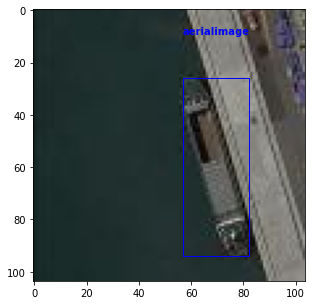

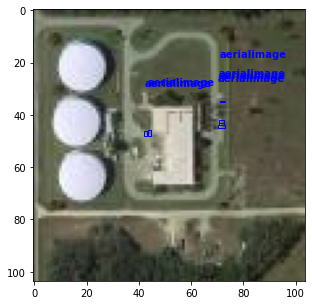

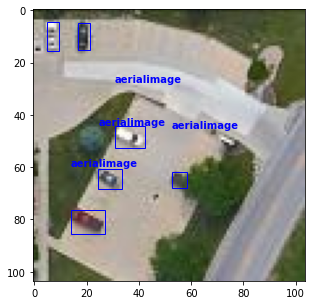

In [ ]:
dataset = CraterDataset('dior/yolov5/train/', get_transform(train=True))
# Prints an example of image with annotations
for i in random.sample(range(1, 100), 3):
    img, target = dataset[i]
    plot_img_bbox(img, target)

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
num_epochs = 5

# our dataset has two classes only - background and crater
num_classes = 3
# use our dataset and defined transformations
dataset = CraterDataset('dior/yolov5/train', get_transform(train=True))
dataset_test = CraterDataset('dior/yolov5/valid', get_transform(train=False))

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=8, shuffle=True, num_workers=0,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

# get the model using our helper function
model = get_model_bbox(num_classes)

'''
Use this to reset all trainable weights
model.apply(reset_weights)
'''

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,  # Feel free to play with values
                            momentum=0.9, weight_decay=0)

# Defining learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=20,
                                                gamma=0.2)


result_mAP = []
best_epoch = None

# Let's train!
for epoch in range(num_epochs):


    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=50)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    results =  evaluate(model, data_loader_test, device=device)
    # saves results of mAP @ IoU = 0.5
    result_mAP.append(results.coco_eval['bbox'].stats[1])
    #save the best model so far
    if result_mAP[-1] == max(result_mAP):
        best_save_path = os.path.join(f'bestmodel_noaug_sgd(wd=0)_8batch-epoch{epoch}.pth')
        torch.save(model.state_dict(), best_save_path)
        best_epoch = int(epoch)
        print(f'\n\nmodel from epoch number {epoch} saved!\n result is {max(result_mAP)}\n\n')

# Saving the last model
save_path = os.path.join(f'noaug_sgd_2batch-lastepoch{num_epochs-1}.pth')
torch.save(model.state_dict(), save_path)
print(f'model from last epoch(no.{num_epochs-1}) saved')

Epoch: [0]  [ 0/75]  eta: 0:22:11  lr: 0.000950  loss: 2.4460 (2.4460)  loss_classifier: 0.6924 (0.6924)  loss_box_reg: 0.2301 (0.2301)  loss_objectness: 1.3389 (1.3389)  loss_rpn_box_reg: 0.1846 (0.1846)  time: 17.7565  data: 0.0179
Epoch: [0]  [50/75]  eta: 0:09:31  lr: 0.005000  loss: 0.6984 (0.8715)  loss_classifier: 0.2034 (0.2431)  loss_box_reg: 0.1818 (0.1817)  loss_objectness: 0.1507 (0.3375)  loss_rpn_box_reg: 0.0671 (0.1093)  time: 26.1778  data: 0.0552
Epoch: [0]  [74/75]  eta: 0:00:23  lr: 0.005000  loss: 0.7060 (0.8255)  loss_classifier: 0.1803 (0.2264)  loss_box_reg: 0.1931 (0.1891)  loss_objectness: 0.2170 (0.3003)  loss_rpn_box_reg: 0.1123 (0.1097)  time: 26.1507  data: 0.0590
Epoch: [0] Total time: 0:29:53 (23.9176 s / it)
creating index...
index created!
Test:  [  0/187]  eta: 0:20:29  model_time: 6.5651 (6.5651)  evaluator_time: 0.0090 (0.0090)  time: 6.5770  data: 0.0030
Test:  [100/187]  eta: 0:10:27  model_time: 6.1959 (7.1806)  evaluator_time: 0.0060 (0.0218)  ti



model from epoch number 3 saved!
 result is 0.4145635782151641


Epoch: [4]  [ 0/75]  eta: 0:31:00  lr: 0.005000  loss: 0.4876 (0.4876)  loss_classifier: 0.1234 (0.1234)  loss_box_reg: 0.1913 (0.1913)  loss_objectness: 0.1005 (0.1005)  loss_rpn_box_reg: 0.0724 (0.0724)  time: 24.8024  data: 0.0478
Epoch: [4]  [50/75]  eta: 0:09:24  lr: 0.005000  loss: 0.4048 (0.4728)  loss_classifier: 0.1197 (0.1236)  loss_box_reg: 0.1735 (0.1735)  loss_objectness: 0.0988 (0.1088)  loss_rpn_box_reg: 0.0590 (0.0670)  time: 18.3986  data: 0.0294
Epoch: [4]  [74/75]  eta: 0:00:21  lr: 0.005000  loss: 0.4890 (0.4837)  loss_classifier: 0.1189 (0.1251)  loss_box_reg: 0.1739 (0.1739)  loss_objectness: 0.1118 (0.1139)  loss_rpn_box_reg: 0.0756 (0.0708)  time: 18.3923  data: 0.0325
Epoch: [4] Total time: 0:26:33 (21.2478 s / it)
creating index...
index created!
Test:  [  0/187]  eta: 0:16:26  model_time: 5.2749 (5.2749)  evaluator_time: 0.0010 (0.0010)  time: 5.2779  data: 0.0020
Test:  [100/187]  eta: 0:08:0

In [10]:
p_rcnn = 0.564
r_rcnn = 0.641
mAP_rcnn = 0.423

In [11]:
storeResults('FasterRCNN',p_rcnn,r_rcnn,mAP_rcnn)

In [ ]:
dataset_test = CraterDataset('dior/yolov5/valid', get_transform(train=False))

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

model = get_model_bbox(num_classes)

# load model to evaluate
model.load_state_dict(torch.load(os.path.join(f'bestmodel_noaug_sgd(wd=0)_8batch-epoch{best_epoch}.pth'),map_location=device))
model.to(device)
evaluate(model, data_loader_test, device=device)

creating index...
index created!
Test:  [  0/187]  eta: 0:18:48  model_time: 6.0314 (6.0314)  evaluator_time: 0.0010 (0.0010)  time: 6.0344  data: 0.0020
Test:  [100/187]  eta: 0:10:42  model_time: 7.7252 (7.3584)  evaluator_time: 0.0030 (0.0169)  time: 7.4346  data: 0.0125
Test:  [186/187]  eta: 0:00:06  model_time: 5.2714 (6.7081)  evaluator_time: 0.0040 (0.0156)  time: 5.2959  data: 0.0059
Test: Total time: 0:20:58 (6.7308 s / it)
Averaged stats: model_time: 5.2714 (6.7081)  evaluator_time: 0.0040 (0.0156)
Accumulating evaluation results...
DONE (t=0.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.179
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.428
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.564
 Average Precisio

# RetinaNet

In [ ]:
def get_model_bbox(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

    # get number of input features for the classifier
    #in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    #model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [ ]:
def get_transform(train):
    if train:
        return A.Compose([
            # A.Flip(p=0.5),
            # A.RandomResizedCrop(height=640,width=640,p=0.4),
            # # A.Perspective(p=0.4),
            # A.Rotate(p=0.5),
            # # A.Transpose(p=0.3),
            ToTensorV2(p=1.0)],
            bbox_params=A.BboxParams(format='pascal_voc',min_visibility=0.4, label_fields=['labels']))
    else:
        return A.Compose([ToTensorV2(p=1.0)],
                         bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.5, label_fields=['labels']))

In [ ]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
    if hasattr(layer, 'reset_parameters'):
        print(f'Reset trainable parameters of layer = {layer}')
        layer.reset_parameters()

In [ ]:
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)
    a.imshow(img.permute((1,2,0)))
    for box in (target['boxes']):
        x, y, width, height = box[0], box[1], box[2] - box[0], box[3] - box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 edgecolor='b',
                                 facecolor='none',
                                 clip_on=False)
        a.annotate('aerialimage', (x,y-20), color='blue', weight='bold',
                   fontsize=10, ha='left', va='top')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()

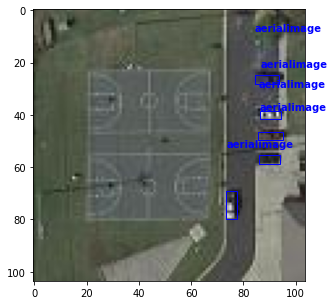

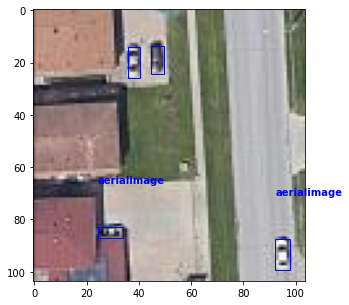

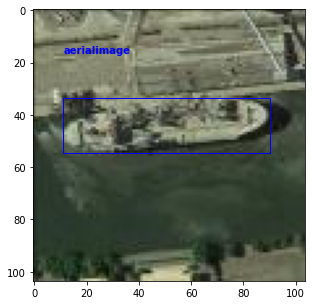

In [ ]:
dataset = CraterDataset('dior/yolov5/valid', get_transform(train=True))
# Prints an example of image with annotations
for i in random.sample(range(1, 100), 3):
    img, target = dataset[i]
    plot_img_bbox(img, target)

In [ ]:
num_epochs = 5

# our dataset has two classes only - background and crater
num_classes = 3
# use our dataset and defined transformations
dataset = CraterDataset('dior/yolov5/train', get_transform(train=True))
dataset_test = CraterDataset('dior/yolov5/valid', get_transform(train=False))

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=8, shuffle=True, num_workers=0,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

# get the model using our helper function
model = get_model_bbox(num_classes)

'''
Use this to reset all trainable weights
model.apply(reset_weights)
'''

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,  # Feel free to play with values
                            momentum=0.9, weight_decay=0)

# Defining learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=20,
                                                gamma=0.2)


result_mAP = []
best_epoch = None

# Let's train!
for epoch in range(num_epochs):


    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=50)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    results =  evaluate(model, data_loader_test, device=device)
    # saves results of mAP @ IoU = 0.5
    result_mAP.append(results.coco_eval['bbox'].stats[1])
    #save the best model so far
    if result_mAP[-1] == max(result_mAP):
        best_save_path = os.path.join(f'bestmodel_noaug_sgd(wd=0)_8batch-epoch{epoch}.pth')
        torch.save(model.state_dict(), best_save_path)
        best_epoch = int(epoch)
        print(f'\n\nmodel from epoch number {epoch} saved!\n result is {max(result_mAP)}\n\n')

# Saving the last model
save_path = os.path.join(f'noaug_sgd_2batch-lastepoch{num_epochs-1}.pth')
torch.save(model.state_dict(), save_path)
print(f'model from last epoch(no.{num_epochs-1}) saved')

Epoch: [0]  [ 0/91]  eta: 0:25:40  lr: 0.000950  loss: 1.9702 (1.9702)  classification: 1.3678 (1.3678)  bbox_regression: 0.6024 (0.6024)  time: 16.9310  data: 0.0718
Epoch: [0]  [50/91]  eta: 0:11:45  lr: 0.005000  loss: 0.9631 (1.1223)  classification: 0.4833 (0.6215)  bbox_regression: 0.4656 (0.5008)  time: 17.2521  data: 0.0663
Epoch: [0]  [90/91]  eta: 0:00:17  lr: 0.005000  loss: 0.7802 (0.9820)  classification: 0.3757 (0.5220)  bbox_regression: 0.4033 (0.4600)  time: 16.9781  data: 0.0646
Epoch: [0] Total time: 0:26:02 (17.1654 s / it)
creating index...
index created!
Test:  [  0/208]  eta: 0:20:14  model_time: 5.8217 (5.8217)  evaluator_time: 0.0080 (0.0080)  time: 5.8367  data: 0.0070
Test:  [100/208]  eta: 0:10:27  model_time: 5.7774 (5.7931)  evaluator_time: 0.0040 (0.0081)  time: 5.8373  data: 0.0077
Test:  [200/208]  eta: 0:00:46  model_time: 5.7727 (5.8181)  evaluator_time: 0.0040 (0.0067)  time: 5.7862  data: 0.0082
Test:  [207/208]  eta: 0:00:05  model_time: 5.7776 (5.8

Epoch: [4]  [ 0/91]  eta: 0:25:01  lr: 0.005000  loss: 0.4038 (0.4038)  classification: 0.1545 (0.1545)  bbox_regression: 0.2493 (0.2493)  time: 16.4963  data: 0.0718
Epoch: [4]  [50/91]  eta: 0:11:23  lr: 0.005000  loss: 0.3468 (0.3463)  classification: 0.1266 (0.1260)  bbox_regression: 0.2211 (0.2203)  time: 16.7004  data: 0.0689
Epoch: [4]  [90/91]  eta: 0:00:16  lr: 0.005000  loss: 0.3727 (0.3600)  classification: 0.1422 (0.1337)  bbox_regression: 0.2257 (0.2263)  time: 16.9324  data: 0.0659
Epoch: [4] Total time: 0:25:24 (16.7545 s / it)
creating index...
index created!
Test:  [  0/208]  eta: 0:20:03  model_time: 5.7723 (5.7723)  evaluator_time: 0.0060 (0.0060)  time: 5.7862  data: 0.0080
Test:  [100/208]  eta: 0:10:28  model_time: 5.7594 (5.8086)  evaluator_time: 0.0010 (0.0050)  time: 5.7693  data: 0.0078
Test:  [200/208]  eta: 0:00:46  model_time: 5.7526 (5.7860)  evaluator_time: 0.0010 (0.0035)  time: 5.7661  data: 0.0082
Test:  [207/208]  eta: 0:00:05  model_time: 5.7620 (5.7

In [12]:
p_retina = 0.541
r_retina = 0.489
mAP_retina = 0.541

In [13]:
storeResults('RetinaNet',p_retina,r_retina,mAP_retina)

In [ ]:
dataset_test = CraterDataset('dior/yolov5/valid', get_transform(train=False))

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

model = get_model_bbox(num_classes)

# load model to evaluate
model.load_state_dict(torch.load(os.path.join(f'bestmodel_noaug_sgd(wd=0)_8batch-epoch{best_epoch}.pth'),map_location=device))
model.to(device)
evaluate(model, data_loader_test, device=device)

creating index...
index created!
Test:  [  0/187]  eta: 0:18:00  model_time: 5.7717 (5.7717)  evaluator_time: 0.0020 (0.0020)  time: 5.7757  data: 0.0020
Test:  [100/187]  eta: 0:08:20  model_time: 5.7349 (5.7472)  evaluator_time: 0.0020 (0.0060)  time: 5.7564  data: 0.0069
Test:  [186/187]  eta: 0:00:05  model_time: 5.7276 (5.7394)  evaluator_time: 0.0020 (0.0064)  time: 5.7438  data: 0.0059
Test: Total time: 0:17:55 (5.7504 s / it)
Averaged stats: model_time: 5.7276 (5.7394)  evaluator_time: 0.0020 (0.0064)
Accumulating evaluation results...
DONE (t=0.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.047
 Average Precisio

# Comparison

In [14]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,

                       'Precision': precision,
                       'Recall'   : recall,
                       'mAP' : mAP,


                      })

In [15]:
result

,ML Model,Precision,Recall,mAP
0,YoloV5s,0.842,0.607,0.663
1,YoloV5x6,0.885,0.645,0.944
2,RAST-Yolo,0.838,0.572,0.626
3,YoloV3,0.877,0.664,0.709
4,YoloV8,0.836,0.645,0.693
5,FasterRCNN,0.564,0.641,0.423
6,RetinaNet,0.541,0.489,0.541


# Graph

In [16]:
import numpy as np

In [17]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Precision

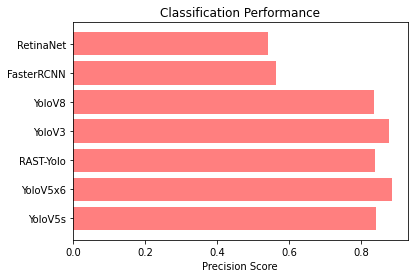

In [19]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

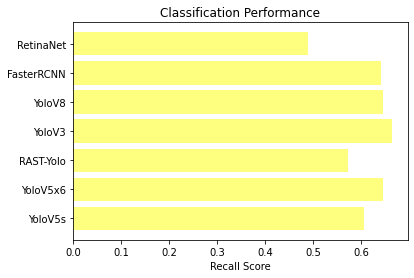

In [20]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# mAP

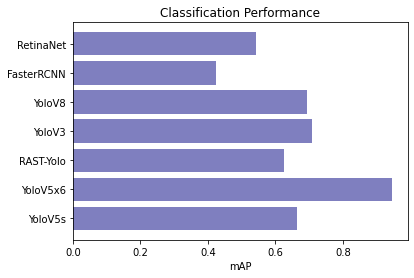

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mAP, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP')
plt2.title('Classification Performance')
plt2.show()